Using the datafile cancer.csv attached and available on Blackboard electronic reserves, perform the activities below.  For this assignment, activities are not specifically scripted.  Rather, develop your notebook leveraging the tools and methodologies that we have covered thus far in the course.  Be as thorough as possible to produce an analysis.  There is  no single way to do this assignment (not to say there is no wrong answer, but there are many possible approaches that are acceptable).  Explore various approaches as you work through your analysis.  Enjoy the journey and do your best!
 
Objective:  Develop a model with  SVC, Random Forrest, and KNN that performs a  binary classification prediction of the target variable:  malignant or benign
 
- Perform EDA (15 pts)
 
- Perform Data Preparation including dealing with categorical data and missing data, normalization, binning if appropriate, feature reduction or selection strategies if helpful.  Feature engineering can also be attempted if you feel it aids in your analysis.  No specific step is required, but these are the tools in your toolbelt that you can use as a data analyst. (15 pts)
 
- Make sure to divide data into testing and training sets. (10 pts)
 
- Train and test your model - use hyperparameter tuning methods (ex. gridsearch; be careful to not use too many options) and pipelines (even if just for the model initialization). (25 pts)
 
- Produce effectiveness metrics and results.  Discuss which are most relevant and analyze results.  Does your approach generalize?  Why are the metrics you chose to assess performance relevant? (25 pts)

- Bypass iteration this time, but compare the different models' results and provide commentary. (10 pts)
 
 
Use text cells within the notebook to explain your approach, review analysis and results.  Provide a conclusion at the end of your analysis – what worked, what didn’t?

In [169]:
# importing all necessary libraries and classes

# pandas for dataframe and csv loading
import pandas as pd

# matplotlib and seaborn for datavisualization
import matplotlib.pyplot as plt
import seaborn as sns

# for math
import statistics
import numpy as np

# data processing
from sklearn.model_selection import train_test_split # split to train and test set. Can use to stratify (ensure spread of classes is equally represented in split)
from sklearn.preprocessing import StandardScaler     # Standard scaler, mean of 0 and std deviation of 1. Helps understand data on similar scale
from sklearn.preprocessing import LabelEncoder       # change objects to integers

# models
from sklearn.linear_model import LogisticRegression  # logestic regression model
from sklearn.neighbors import KNeighborsClassifier   # KNN model
from sklearn.svm import SVC                          # Support Vector mMchine using SVC (Support Vector Classification) for classification tasks
from sklearn.ensemble import RandomForestClassifier  # Random Forest Model

# model automation
from sklearn.pipeline import Pipeline                # Chain multiple data preprocessing and modeling steps together into a single object. This simplifies the workflow and helps to prevent data leakage
from sklearn.model_selection import GridSearchCV     # Used for hyperparameter tuning in machine learning models.(1)It exhaustively searches through a specified grid of hyperparameter (2) values to find the best combination that maximizes model performance.

# metrics
from sklearn.metrics import accuracy_score           # Overall correctness, 1=all correct, 0=all wrong
from sklearn.metrics import precision_score          # Proportion of positive predictions that were actually correct 1=positive prediions are all correct, 0=positive predctions all incorrect
from sklearn.metrics import recall_score             # True positive rate, 1=perfect, 0=terrible
from sklearn.metrics import f1_score                 # Harmonic mean of precision and recall. 1=perfect precision and recall, 0=either perfect precision and zero recall, or zero precision and perfect recall
from sklearn.metrics import confusion_matrix         # Confusion matrix to see true positives, true negatives, and Type 1, 2 errors
from sklearn.metrics import roc_curve, roc_auc_score, auc    # Reciever Operating Characteristic curve (shows how many true positive/negative rates), Area Under Curve (AUC) score, and the AUC

---
## Part1: Perform EDA (15 pts)


In [9]:
#*************************************************************
data = pd.read_csv("cancer.csv")
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

id  radius_mean  texture_mean  perimeter_mean    area_mean  \
count  5.690000e+02   569.000000    569.000000      569.000000   569.000000   
mean   3.037183e+07    14.127292     19.289649       91.969033   654.889104   
std    1.250206e+08     3.524049      4.301036       24.298981   351.914129   
min    8.670000e+03     6.981000      9.710000       43.790000   143.500000   
25%    8.692180e+05    11.700000     16.170000       75.170000   420.300000   
50%    9.060240e+05    13.370000     18.840000       86.240000   551.100000   
75%    8.813129e+06    15.780000     21.800000      104.100000   782.700000   
max    9.113205e+08    28.110000     39.280000      188.500000  2501.000000   

       smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813        0.079720             0.038803   
min           0.052630          0.019380        0.000000             0.000000   
25%           0.086370          0.064920        0.029560             0.020310   
50%           0.095870          0.092630        0.061540             0.033500   
75%           0.105300          0.130400        0.130700             0.074000   
max           0.163400          0.345400        0.426800             0.201200   

       symmetry_mean  ...  texture_worst  perimeter_worst   area_worst  \
count     569.000000  ...     569.000000       569.000000   569.000000   
mean        0.181162  ...      25.677223       107.261213   880.583128   
std         0.027414  ...       6.146258        33.602542   569.356993   
min         0.106000  ...      12.020000        50.410000   185.200000   
25%         0.161900  ...      21.080000        84.110000   515.300000   
50%         0.179200  ...      25.410000        97.660000   686.500000   
75%         0.195700  ...      29.720000       125.400000  1084.000000   
max         0.304000  ...      49.540000       251.200000  4254.000000   

       smoothness_worst  compactness_worst  concavity_worst  \
count        569.000000         569.000000       569.000000   
mean           0.132369           0.254265         0.272188   
std            0.022832           0.157336         0.208624   
min            0.071170           0.027290         0.000000   
25%            0.116600           0.147200         0.114500   
50%            0.131300           0.211900         0.226700   
75%            0.146000           0.339100         0.382900   
max            0.222600           1.058000         1.252000   

       concave points_worst  symmetry_worst  fractal_dimension_worst  \
count            569.000000      569.000000               569.000000   
mean               0.114606        0.290076                 0.083946   
std                0.065732        0.061867                 0.018061   
min                0.000000        0.156500                 0.055040   
25%                0.064930        0.250400                 0.071460   
50%                0.099930        0.282200                 0.080040   
75%                0.161400        0.317900                 0.092080   
max                0.291000        0.663800                 0.207500   

       Unnamed: 32  
count          0.0  
mean           NaN  
std            NaN  
min            NaN  
25%            NaN  
50%            NaN  
75%            NaN  
max            NaN  

[8 rows x 32 columns]

In [31]:
data.head()

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  texture_worst  perimeter_worst  area_worst  smoothness_worst  \
0  ...          17.33           184.60      2019.0            0.1622   
1  ...          23.41           158.80      1956.0            0.1238   
2  ...          25.53           152.50      1709.0            0.1444   
3  ...          26.50            98.87       567.7            0.2098   
4  ...          16.67           152.20      1575.0            0.1374   

   compactness_worst  concavity_worst  concave points_worst  symmetry_worst  \
0             0.6656           0.7119                0.2654          0.4601   
1             0.1866           0.2416                0.1860          0.2750   
2             0.4245           0.4504                0.2430          0.3613   
3             0.8663           0.6869                0.2575          0.6638   
4             0.2050           0.4000                0.1625          0.2364   

   fractal_dimension_worst  Unnamed: 32  
0                  0.11890          NaN  
1                  0.08902          NaN  
2                  0.08758          NaN  
3                  0.17300          NaN  
4                  0.07678          NaN  

[5 rows x 33 columns]

In [8]:
data.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [14]:
for column in data.columns:
    print(column)

id
diagnosis
radius_mean
texture_mean
perimeter_mean
area_mean
smoothness_mean
compactness_mean
concavity_mean
concave points_mean
symmetry_mean
fractal_dimension_mean
radius_se
texture_se
perimeter_se
area_se
smoothness_se
compactness_se
concavity_se
concave points_se
symmetry_se
fractal_dimension_se
radius_worst
texture_worst
perimeter_worst
area_worst
smoothness_worst
compactness_worst
concavity_worst
concave points_worst
symmetry_worst
fractal_dimension_worst
Unnamed: 32


Seems like the first and last columns hold no value, so they will be dropped.

In [10]:
#*************************************************************
data.drop(["id",data.columns[-1]], axis=1, inplace=True)

In [33]:
data.head()

diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0         M        17.99         10.38          122.80     1001.0   
1         M        20.57         17.77          132.90     1326.0   
2         M        19.69         21.25          130.00     1203.0   
3         M        11.42         20.38           77.58      386.1   
4         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   symmetry_mean  ...  radius_worst  texture_worst  perimeter_worst  \
0         0.2419  ...         25.38          17.33           184.60   
1         0.1812  ...         24.99          23.41           158.80   
2         0.2069  ...         23.57          25.53           152.50   
3         0.2597  ...         14.91          26.50            98.87   
4         0.1809  ...         22.54          16.67           152.20   

   area_worst  smoothness_worst  compactness_worst  concavity_worst  \
0      2019.0            0.1622             0.6656           0.7119   
1      1956.0            0.1238             0.1866           0.2416   
2      1709.0            0.1444             0.4245           0.4504   
3       567.7            0.2098             0.8663           0.6869   
4      1575.0            0.1374             0.2050           0.4000   

   concave points_worst  symmetry_worst  fractal_dimension_worst  
0                0.2654          0.4601                  0.11890  
1                0.1860          0.2750                  0.08902  
2                0.2430          0.3613                  0.08758  
3                0.2575          0.6638                  0.17300  
4                0.1625          0.2364                  0.07678  

[5 rows x 31 columns]

Looks like "diagnosis" is either a M or B, so i need to change this to a label.

In [11]:
#*************************************************************

le = LabelEncoder()
data["diagnosis labeled"] = le.fit_transform(data["diagnosis"])
data.drop("diagnosis", axis=1, inplace=True)
labels = le.classes_
print(labels)
data.head()

['B' 'M']


radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   compactness_mean  concavity_mean  concave points_mean  symmetry_mean  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   fractal_dimension_mean  ...  texture_worst  perimeter_worst  area_worst  \
0                 0.07871  ...          17.33           184.60      2019.0   
1                 0.05667  ...          23.41           158.80      1956.0   
2                 0.05999  ...          25.53           152.50      1709.0   
3                 0.09744  ...          26.50            98.87       567.7   
4                 0.05883  ...          16.67           152.20      1575.0   

   smoothness_worst  compactness_worst  concavity_worst  concave points_worst  \
0            0.1622             0.6656           0.7119                0.2654   
1            0.1238             0.1866           0.2416                0.1860   
2            0.1444             0.4245           0.4504                0.2430   
3            0.2098             0.8663           0.6869                0.2575   
4            0.1374             0.2050           0.4000                0.1625   

   symmetry_worst  fractal_dimension_worst  diagnosis labeled  
0          0.4601                  0.11890                  1  
1          0.2750                  0.08902                  1  
2          0.3613                  0.08758                  1  
3          0.6638                  0.17300                  1  
4          0.2364                  0.07678                  1  

[5 rows x 31 columns]

So 0=B (benign) and 1=M (malignent) in "diagnosis labeled"

In [16]:
correlation_array = data.corr()
print(correlation_array)

                         radius_mean  texture_mean  perimeter_mean  area_mean  \
radius_mean                 1.000000      0.323782        0.997855   0.987357   
texture_mean                0.323782      1.000000        0.329533   0.321086   
perimeter_mean              0.997855      0.329533        1.000000   0.986507   
area_mean                   0.987357      0.321086        0.986507   1.000000   
smoothness_mean             0.170581     -0.023389        0.207278   0.177028   
compactness_mean            0.506124      0.236702        0.556936   0.498502   
concavity_mean              0.676764      0.302418        0.716136   0.685983   
concave points_mean         0.822529      0.293464        0.850977   0.823269   
symmetry_mean               0.147741      0.071401        0.183027   0.151293   
fractal_dimension_mean     -0.311631     -0.076437       -0.261477  -0.283110   
radius_se                   0.679090      0.275869        0.691765   0.732562   
texture_se                 -

<BarContainer object of 2 artists>

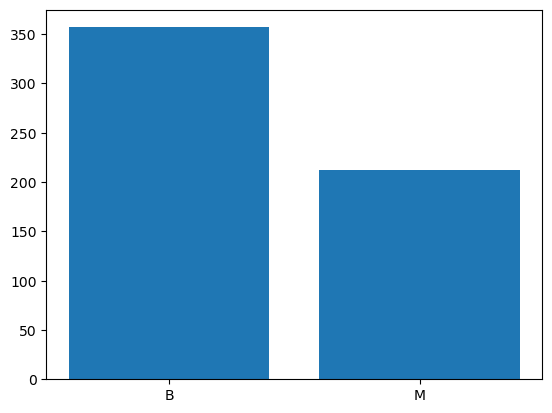

In [42]:
diagnosis_count = data["diagnosis labeled"].value_counts()
# using matplotlib.pyplot
plt.bar(labels, diagnosis_count)

Seems like there are more benign than malignent cancer reports, which is good.

<Axes: >

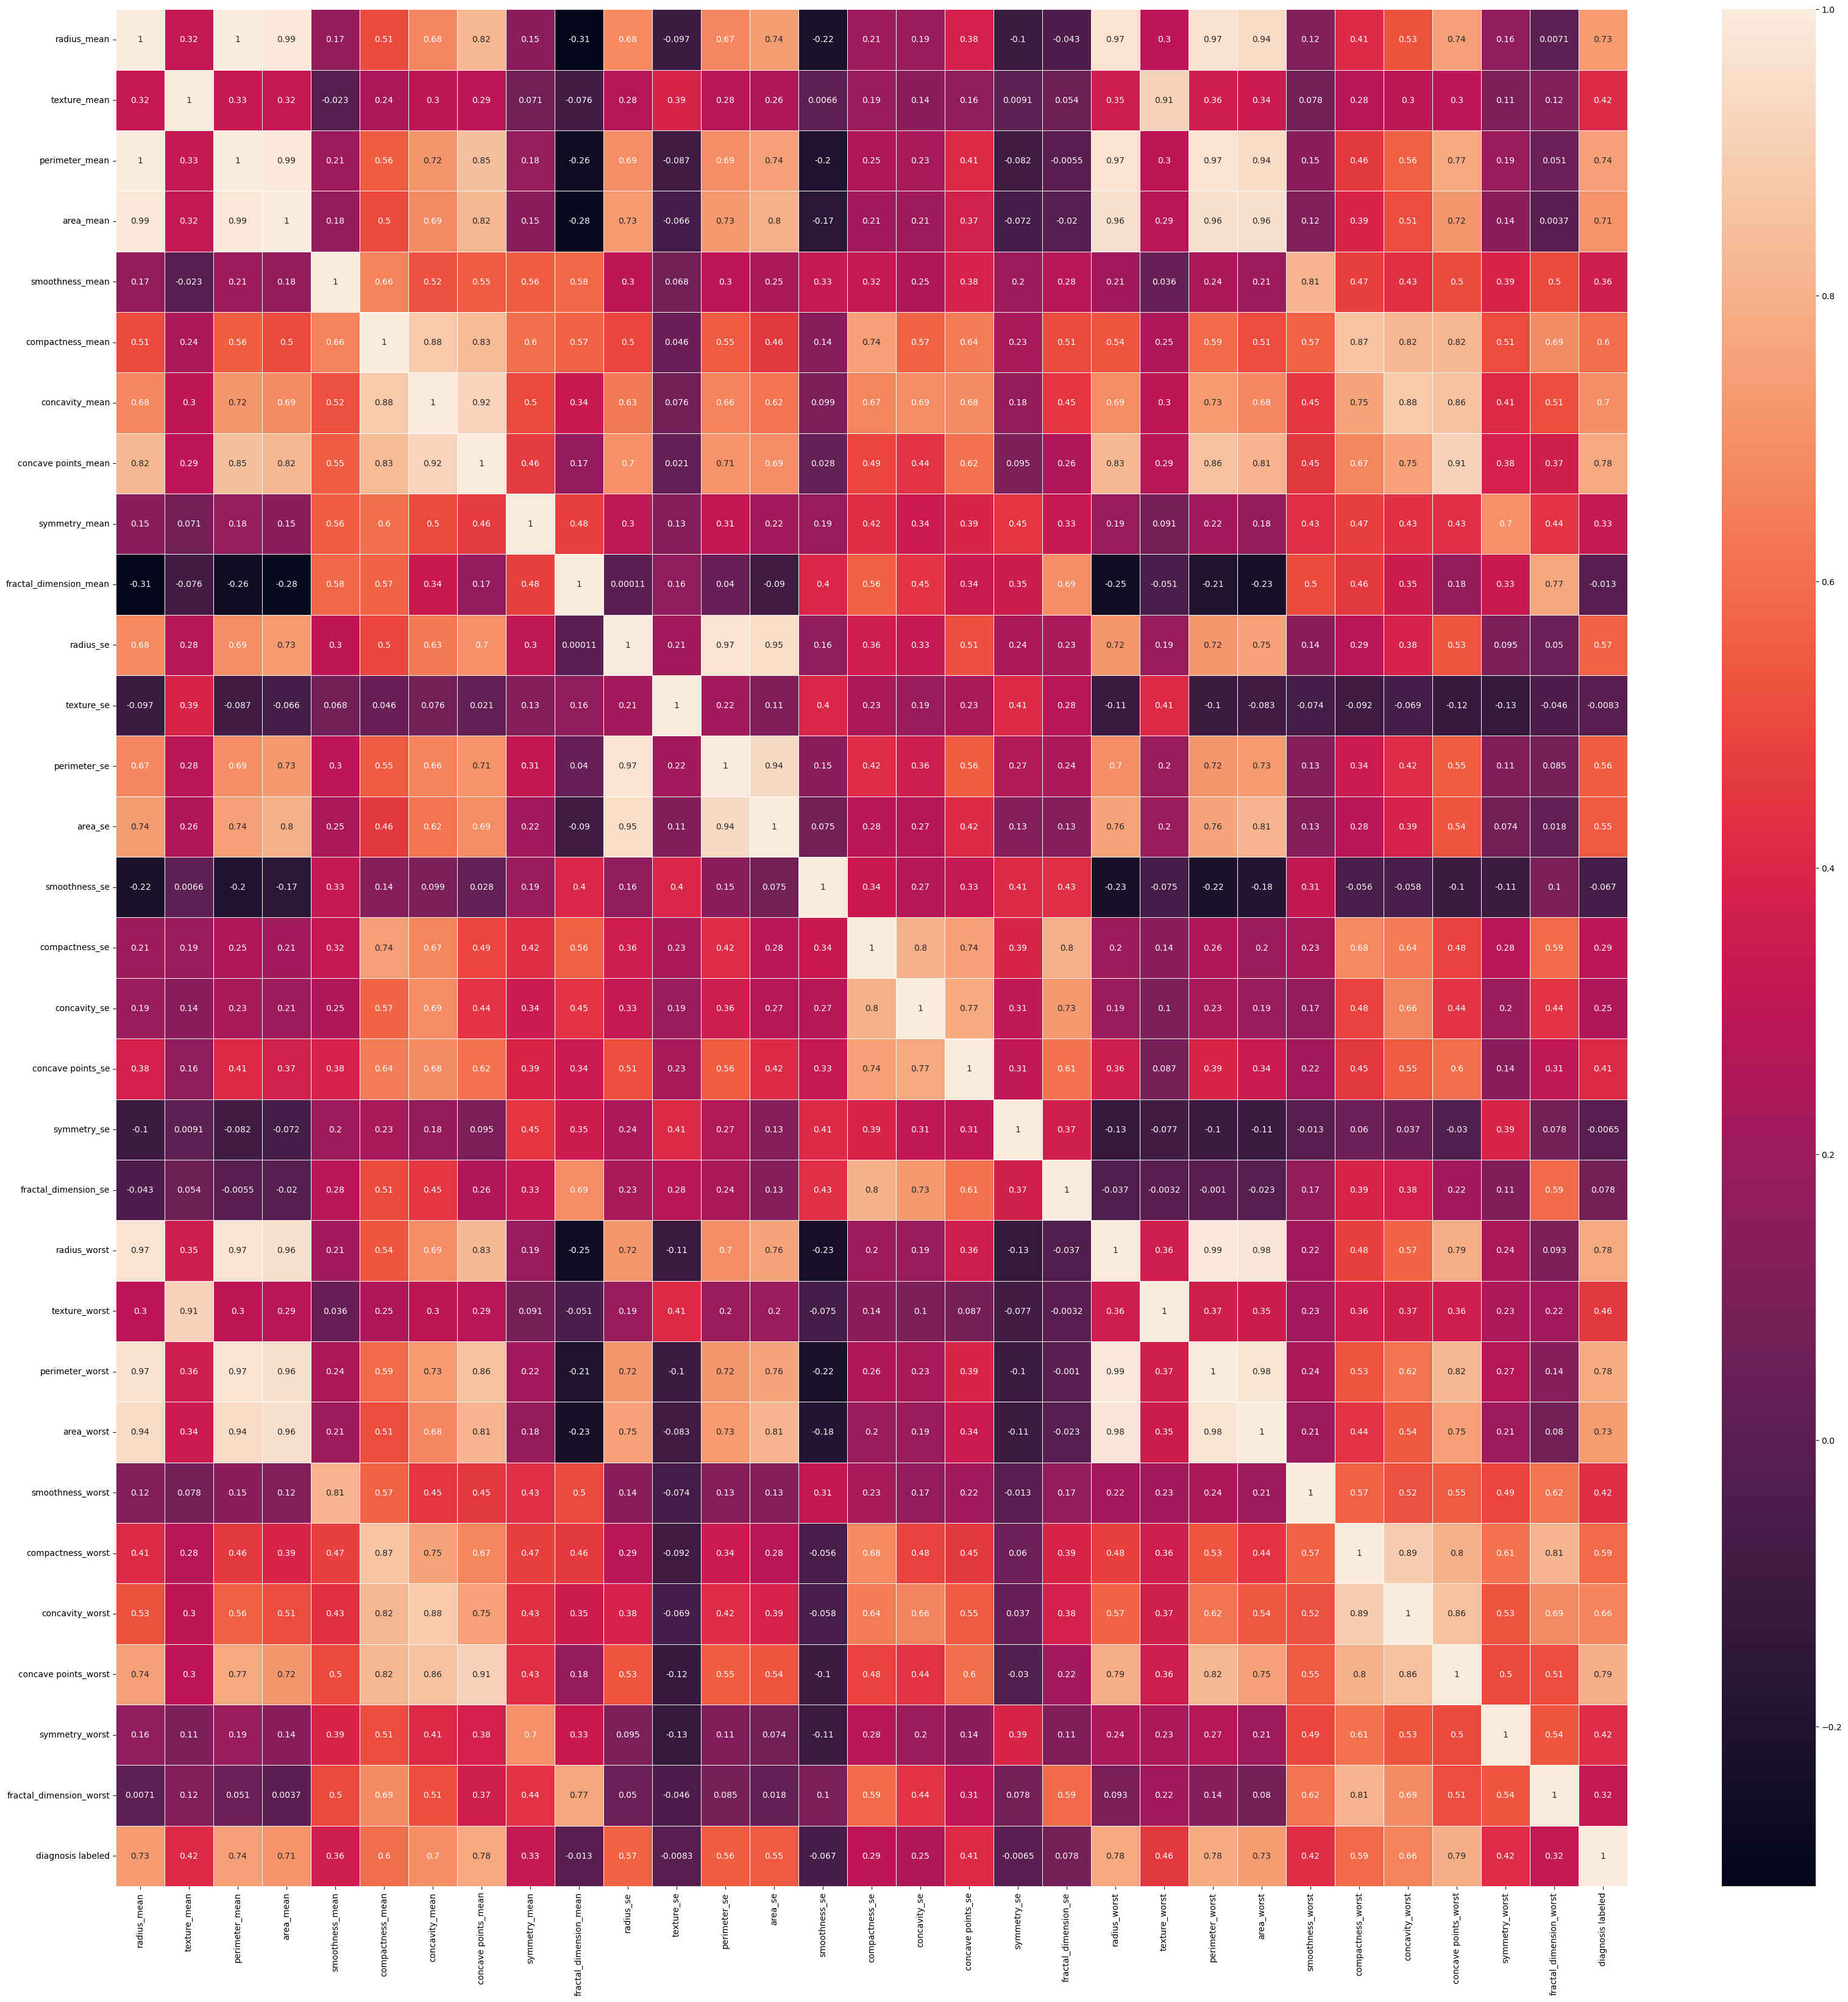

In [14]:
# using seaborn
fig, ax = plt.subplots(figsize=(40,40))
sns.heatmap(data.corr(), annot=True, linewidths=0.5, ax=ax)

Looking at this, there are a LOT of features that correlate heavily with diagnosis labeled and with each other.

======= radius_mean =====
Kurtosis: 0.8455216229065377
Skew: 0.9423795716730992


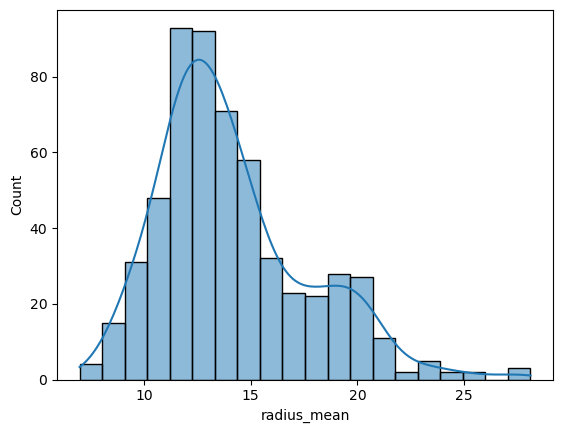

======= texture_mean =====
Kurtosis: 0.7583189723727752
Skew: 0.6504495420828159


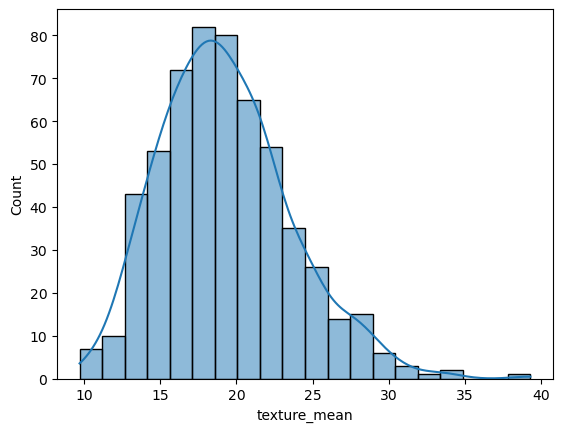

======= perimeter_mean =====
Kurtosis: 0.9722135477110654
Skew: 0.9906504253930081


======= area_mean =====
Kurtosis: 3.6523027623507582
Skew: 1.6457321756240424


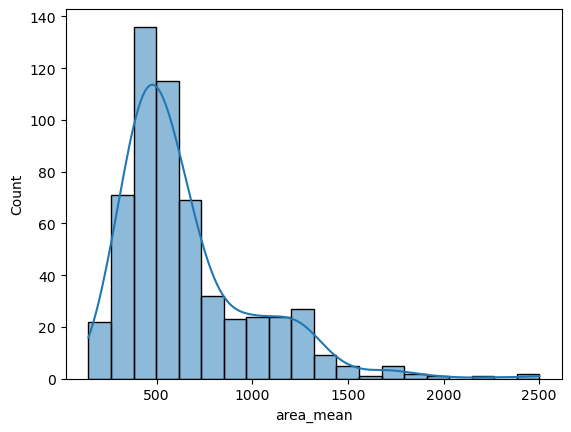

======= smoothness_mean =====
Kurtosis: 0.8559749303632245
Skew: 0.45632376481955844


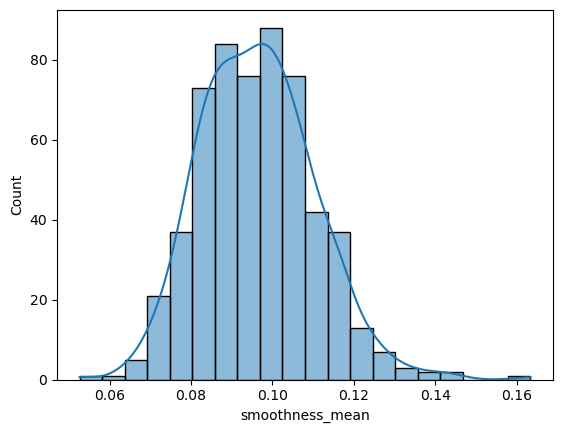

======= compactness_mean =====
Kurtosis: 1.650130467219256
Skew: 1.1901230311980404


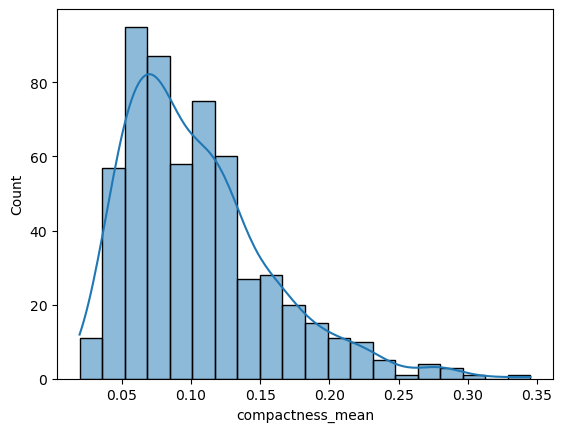

======= concavity_mean =====
Kurtosis: 1.9986375291042124
Skew: 1.4011797389486722


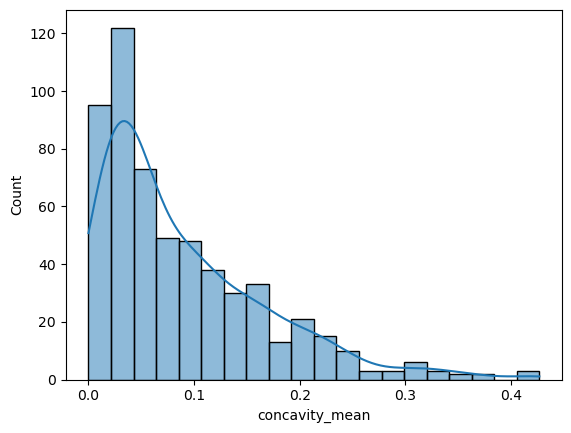

======= concave points_mean =====
Kurtosis: 1.066555702965477
Skew: 1.1711800812336282


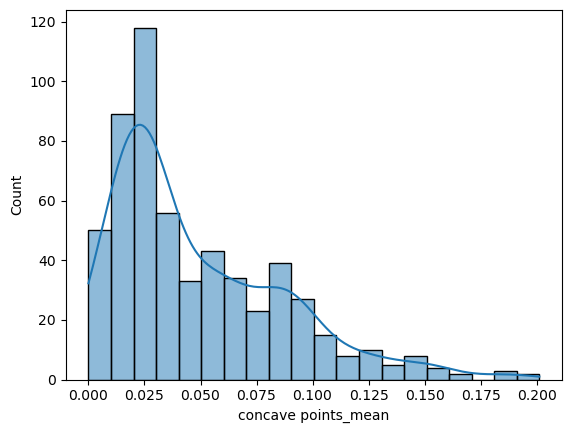

======= symmetry_mean =====
Kurtosis: 1.2879329922294565
Skew: 0.7256089733641999


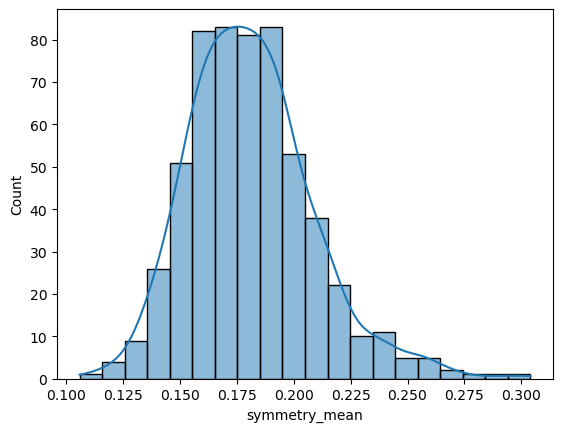

======= fractal_dimension_mean =====
Kurtosis: 3.0058921201694933
Skew: 1.3044888125755076


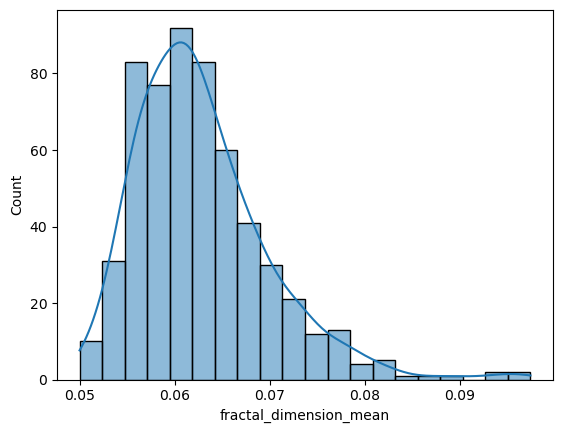

======= radius_se =====
Kurtosis: 17.686725966164644
Skew: 3.0886121663847574


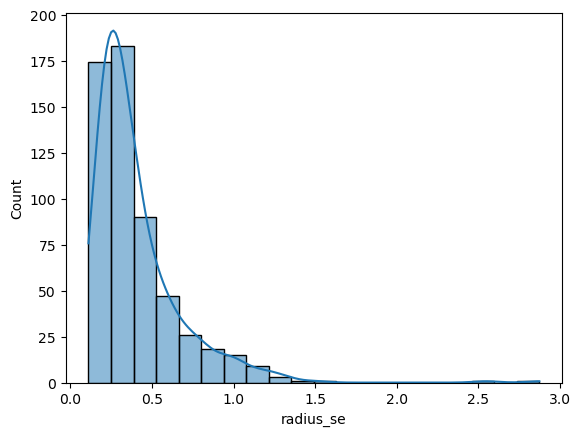

======= texture_se =====
Kurtosis: 5.349168692469973
Skew: 1.646443808753053


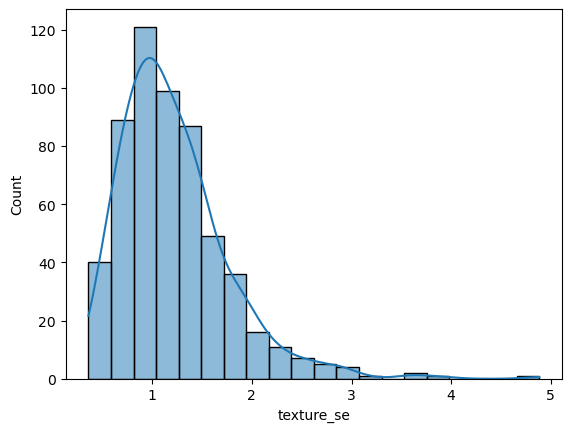

======= perimeter_se =====
Kurtosis: 21.40190492588045
Skew: 3.443615202194899


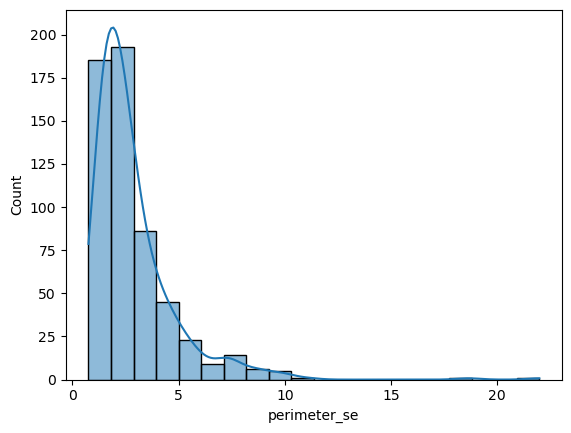

======= area_se =====
Kurtosis: 49.20907650724119
Skew: 5.447186284898394


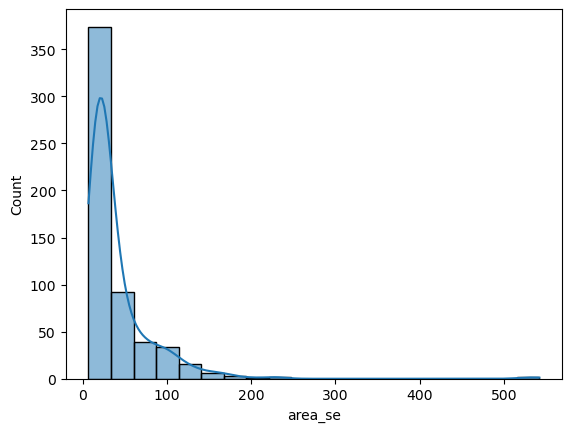

======= smoothness_se =====
Kurtosis: 10.469839532360393
Skew: 2.314450056636759


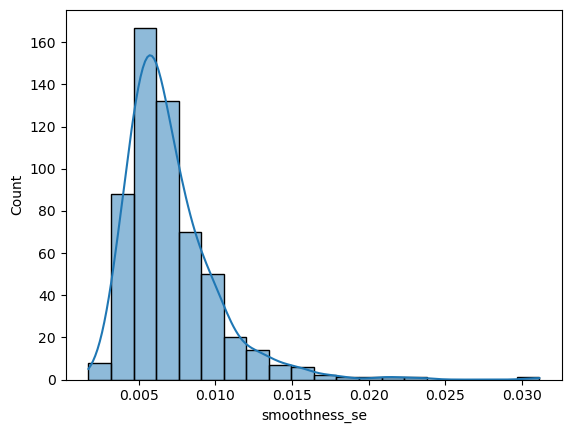

======= compactness_se =====
Kurtosis: 5.10625248342338
Skew: 1.9022207096378565


======= concavity_se =====
Kurtosis: 48.8613953017919
Skew: 5.110463049043661


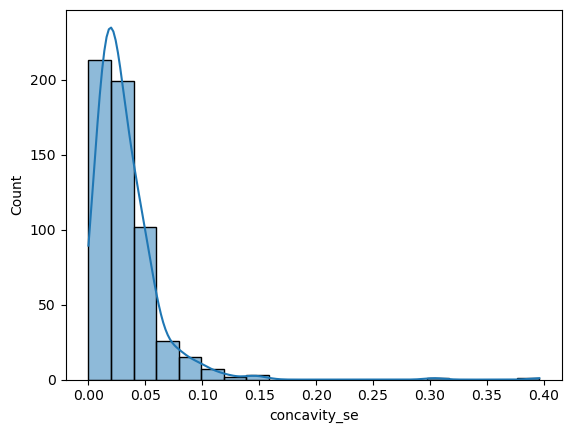

======= concave points_se =====
Kurtosis: 5.1263019430439565
Skew: 1.4446781446974786


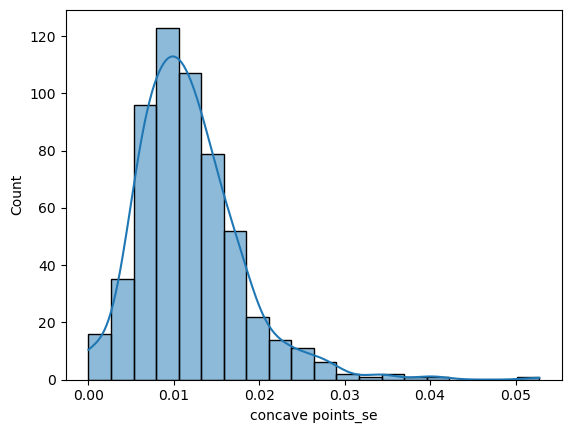

======= symmetry_se =====
Kurtosis: 7.896129827528971
Skew: 2.1951328995478216


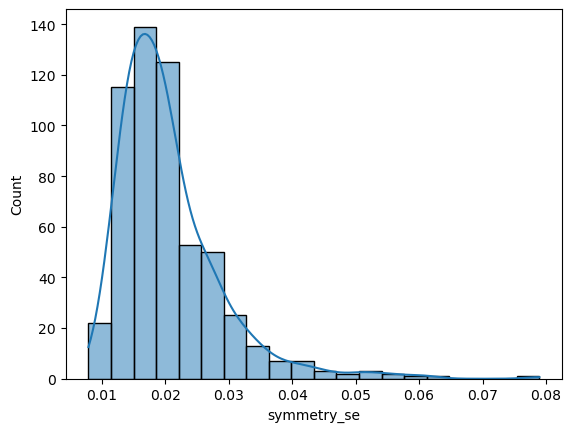

======= fractal_dimension_se =====
Kurtosis: 26.280847486373336
Skew: 3.923968620227413


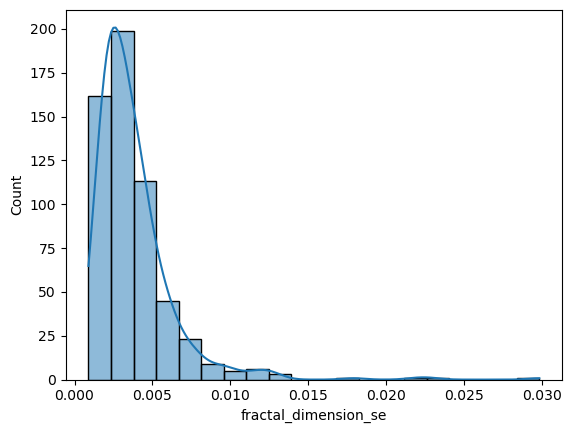

======= radius_worst =====
Kurtosis: 0.9440895758772196
Skew: 1.1031152059604372


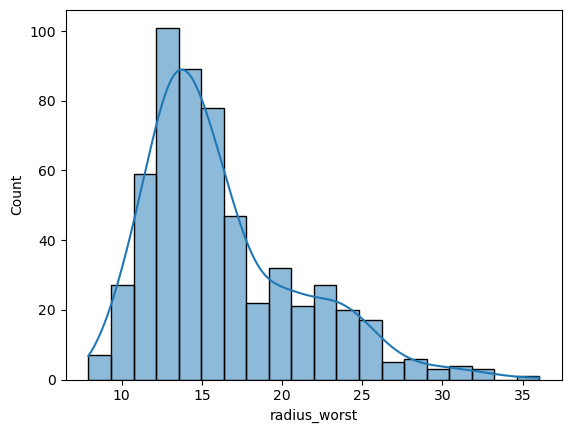

======= texture_worst =====
Kurtosis: 0.22430186846478772
Skew: 0.49832130948716474


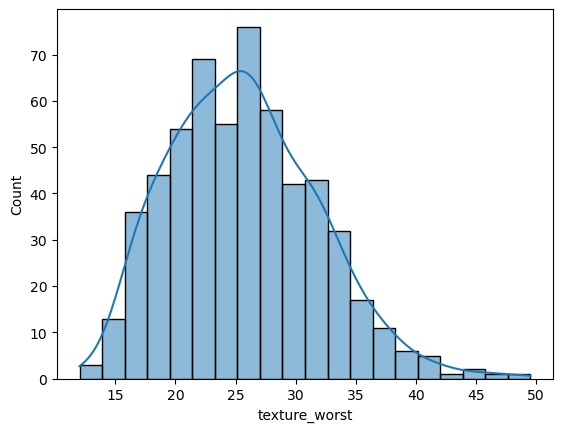

======= perimeter_worst =====
Kurtosis: 1.070149666654432
Skew: 1.1281638713683722


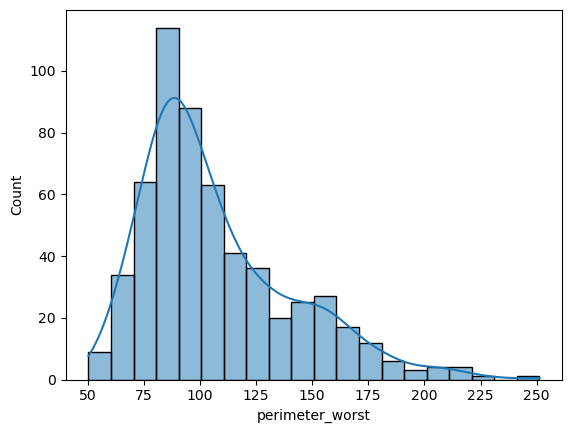

======= area_worst =====
Kurtosis: 4.396394828992138
Skew: 1.8593732724433467


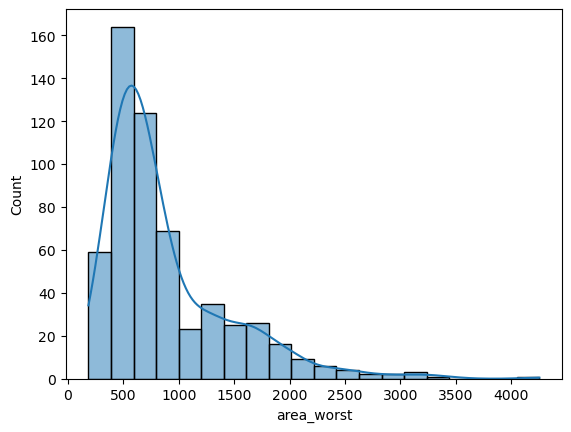

======= smoothness_worst =====
Kurtosis: 0.5178251903311124
Skew: 0.4154259962824678


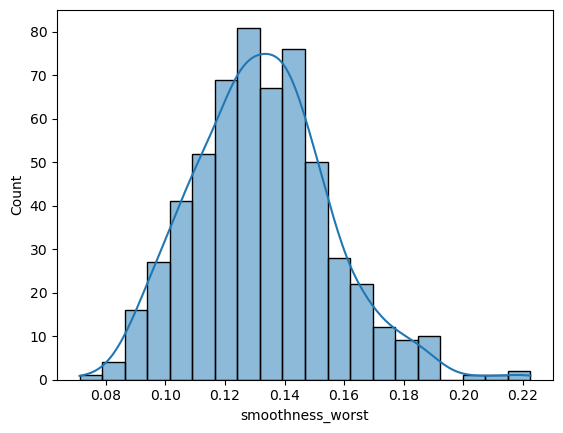

======= compactness_worst =====
Kurtosis: 3.0392881719200657
Skew: 1.4735549003297956


======= concavity_worst =====
Kurtosis: 1.6152532975830205
Skew: 1.1502368219460262


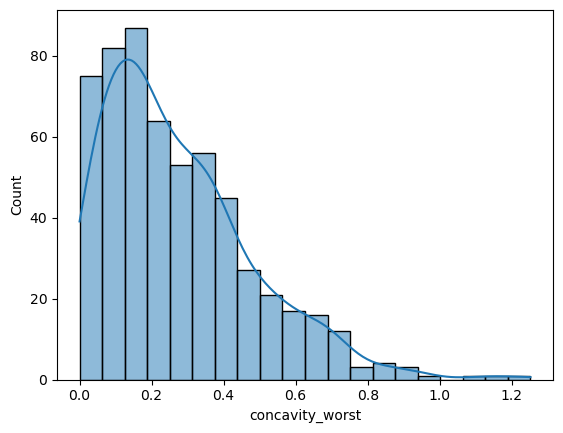

======= concave points_worst =====
Kurtosis: -0.5355351225188589
Skew: 0.49261552688550875


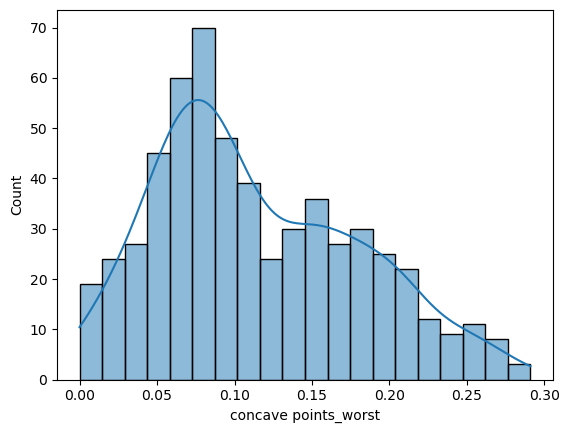

======= symmetry_worst =====
Kurtosis: 4.444559517846582
Skew: 1.433927765189328


======= fractal_dimension_worst =====
Kurtosis: 5.244610555815004
Skew: 1.6625792663955146


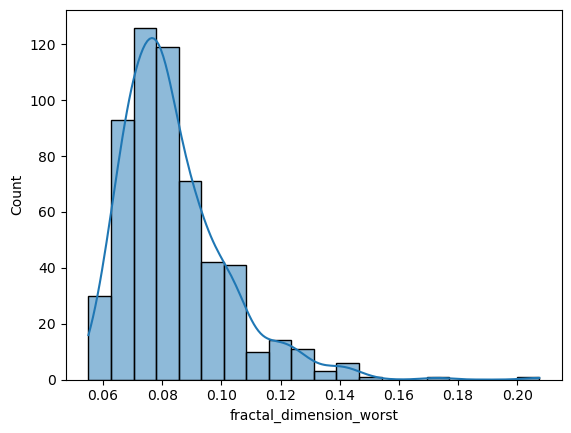

======= diagnosis labeled =====
Kurtosis: -1.7268106799233334
Skew: 0.5284613207977967


7.506943554345568
1.701311687613562


In [67]:
kurtosis_list = []
skew_list = []
for feature in data.columns:
    print(f"======= {feature} =====") 
    print("Kurtosis:", data[feature].kurtosis())
    print("Skew:", data[feature].skew())
    
    plt.figure(data.columns.get_loc(feature)+1)
    sns.histplot(data[feature], kde=True, bins=20)
    plt.show()

    kurtosis_list.append(data[feature].kurtosis())
    skew_list.append(data[feature].skew())

print(statistics.mean(kurtosis_list))
print(statistics.mean(skew_list))

From google: The fractal dimension of an object is a number quantifying how similar the structure remains with changes in length scale and is related to the structural porosity of the tissue samples. Or in other words, how bumpy the surface of an object is. In this case, the bumpier/uneven the surface, the higher the number. Seems somewhat similar to smoothness, but in a dimensional term

However, this is the only "mean" value that is lowly correlated to the diagnosis labeled. Everthing else is SE (standard error perhaps?) and the worst values.

The average kurtosis and skew shows that this data requires non-parametric methods since it is not normally distributed.

Now I will try to review outliers

<Figure size 640x480 with 0 Axes>

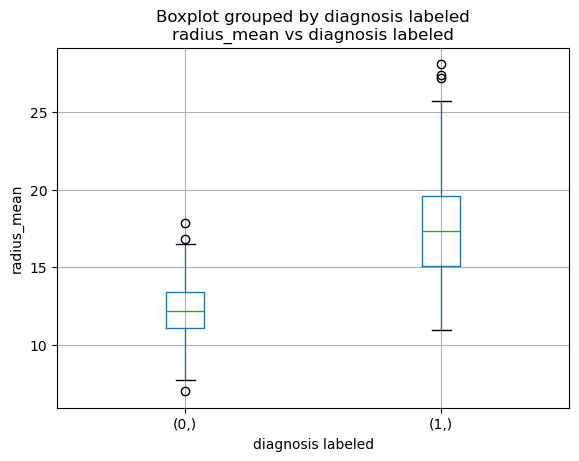

<Figure size 640x480 with 0 Axes>

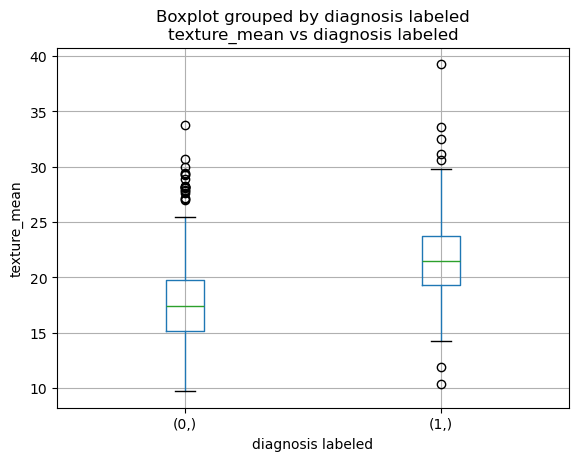

<Figure size 640x480 with 0 Axes>

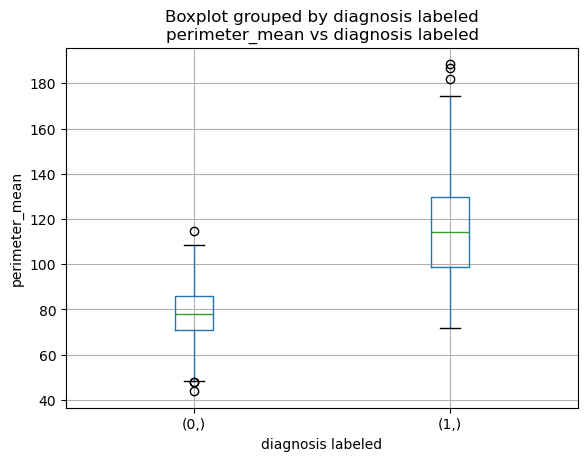

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

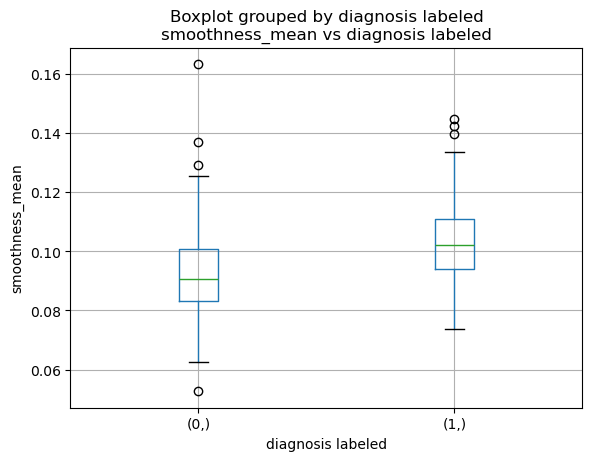

<Figure size 640x480 with 0 Axes>

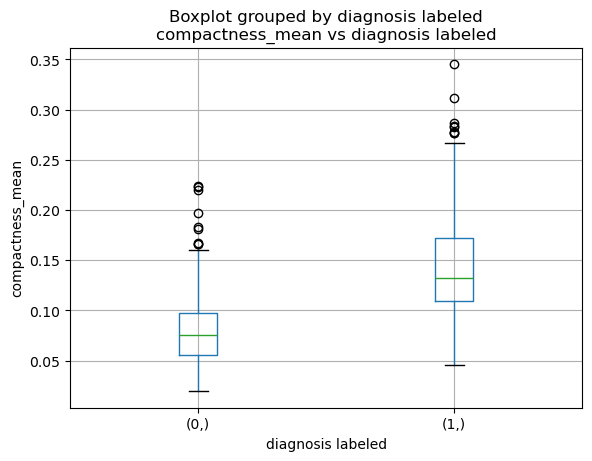

<Figure size 640x480 with 0 Axes>

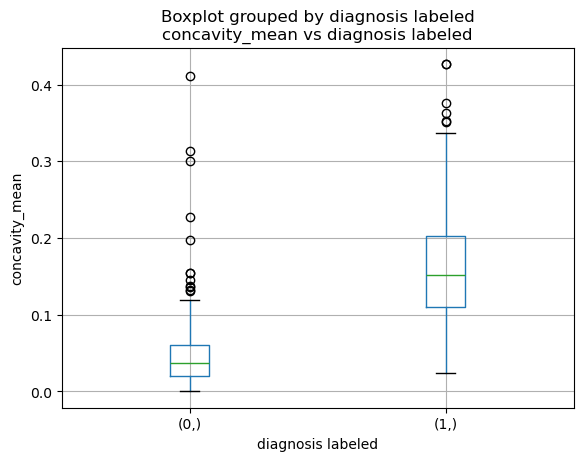

<Figure size 640x480 with 0 Axes>

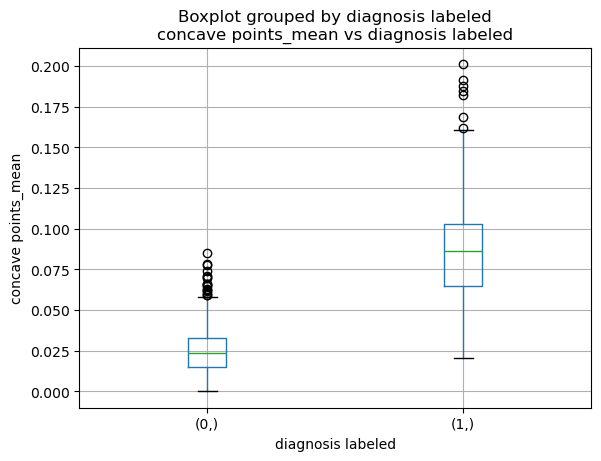

<Figure size 640x480 with 0 Axes>

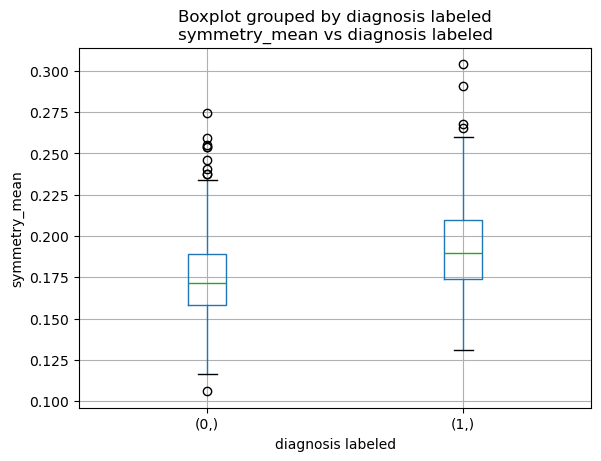

<Figure size 640x480 with 0 Axes>

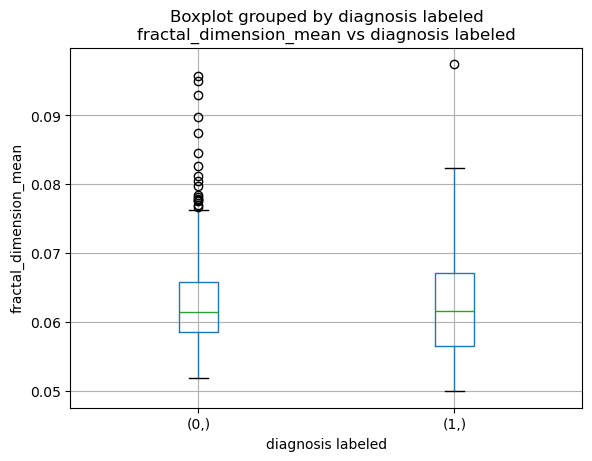

<Figure size 640x480 with 0 Axes>

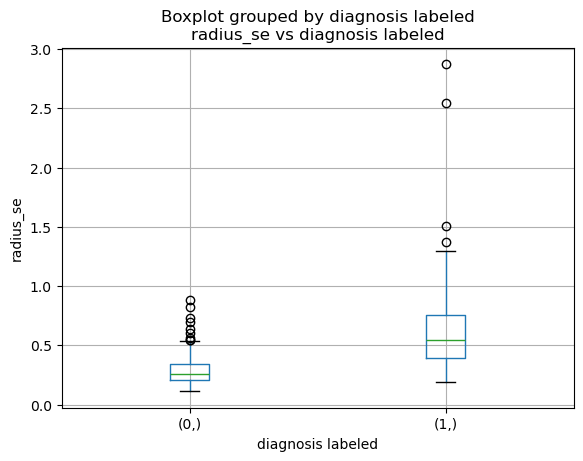

<Figure size 640x480 with 0 Axes>

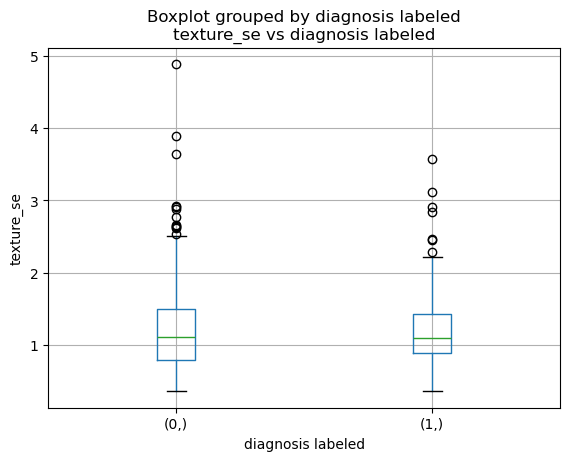

<Figure size 640x480 with 0 Axes>

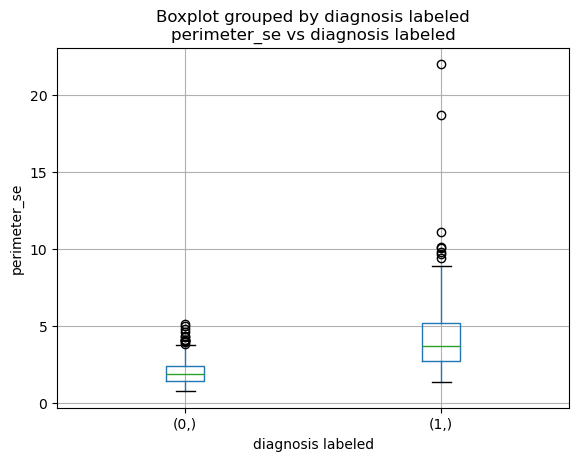

<Figure size 640x480 with 0 Axes>

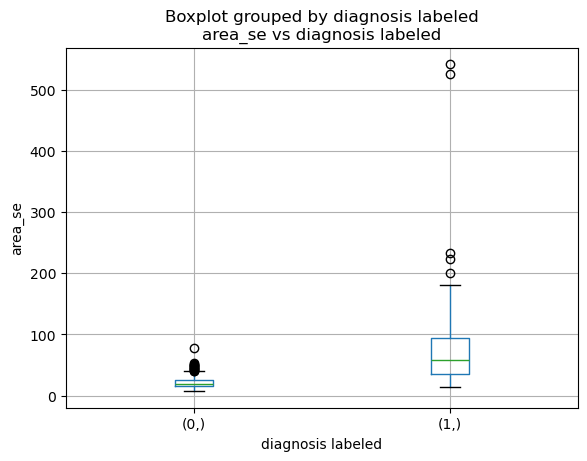

<Figure size 640x480 with 0 Axes>

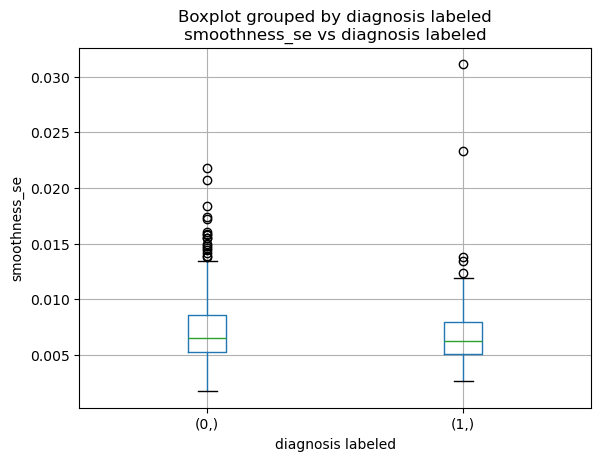

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

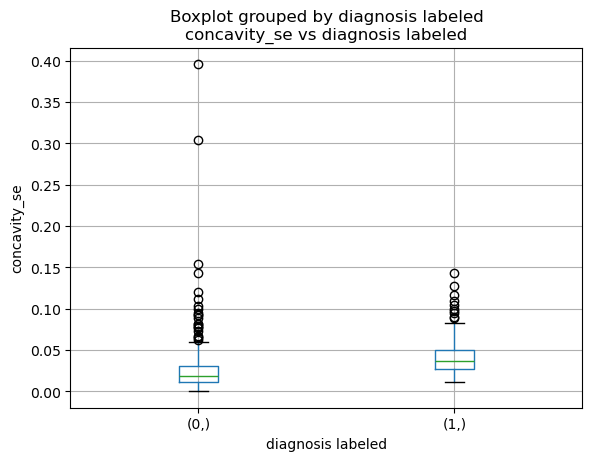

<Figure size 640x480 with 0 Axes>

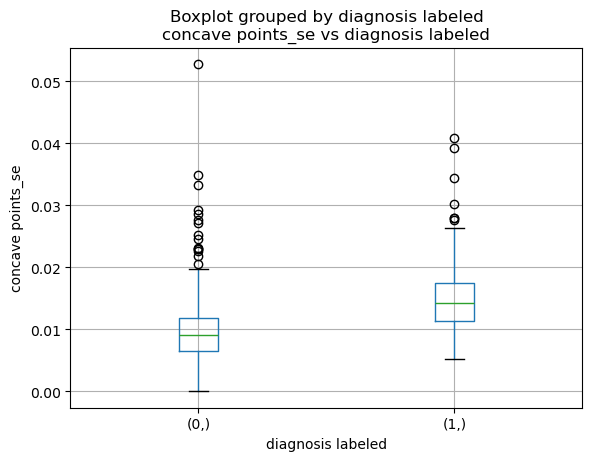

<Figure size 640x480 with 0 Axes>

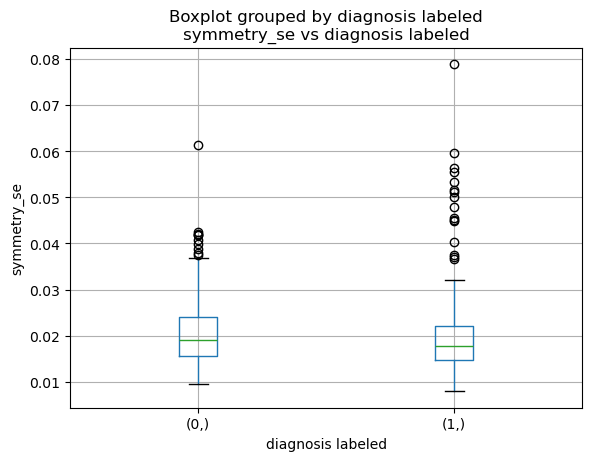

<Figure size 640x480 with 0 Axes>

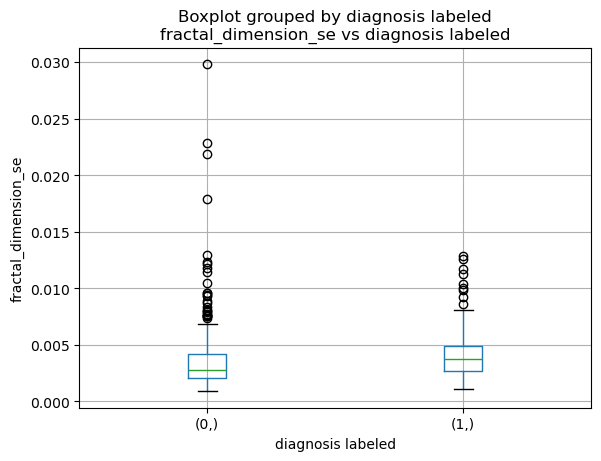

<Figure size 640x480 with 0 Axes>

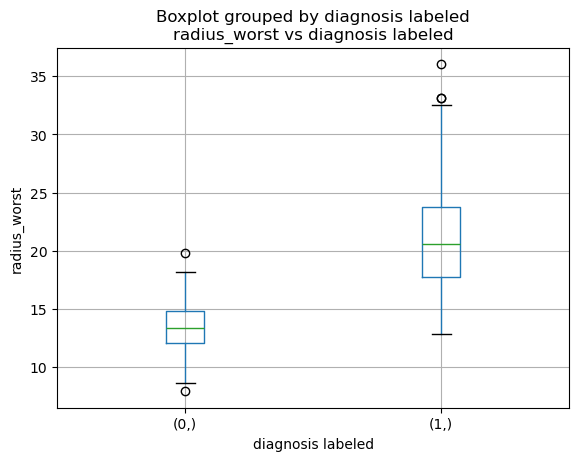

<Figure size 640x480 with 0 Axes>

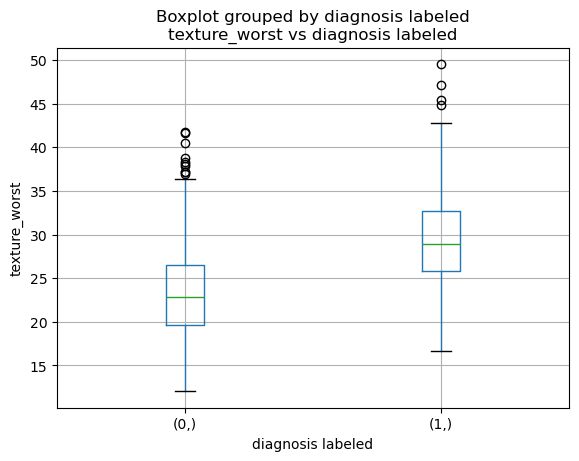

<Figure size 640x480 with 0 Axes>

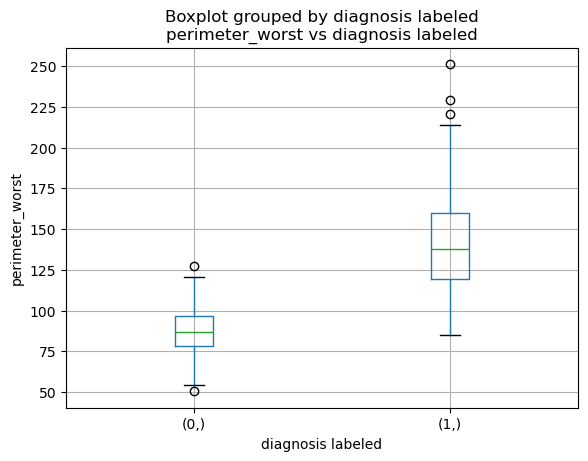

<Figure size 640x480 with 0 Axes>

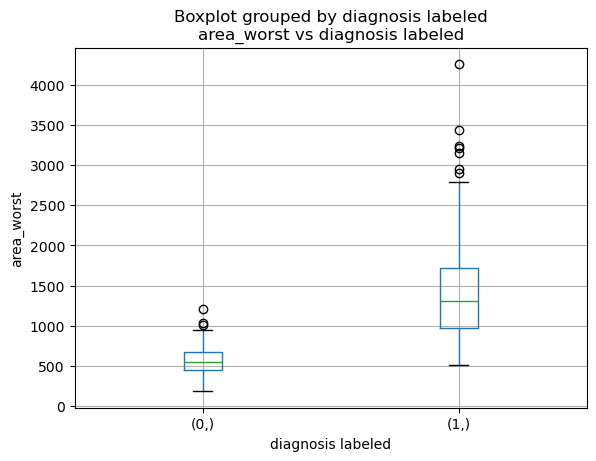

<Figure size 640x480 with 0 Axes>

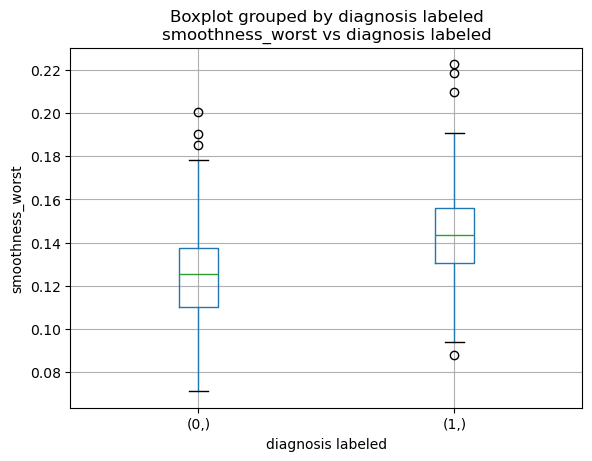

<Figure size 640x480 with 0 Axes>

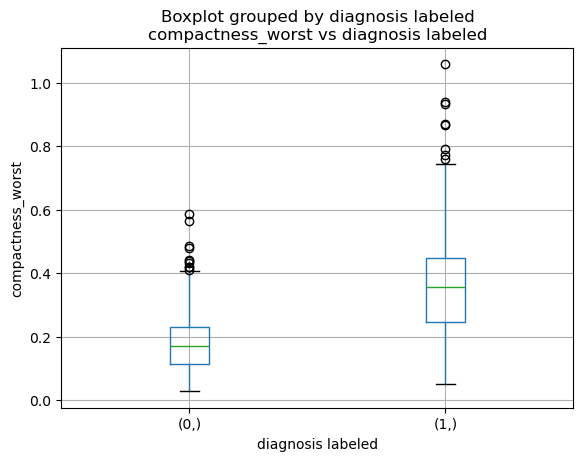

<Figure size 640x480 with 0 Axes>

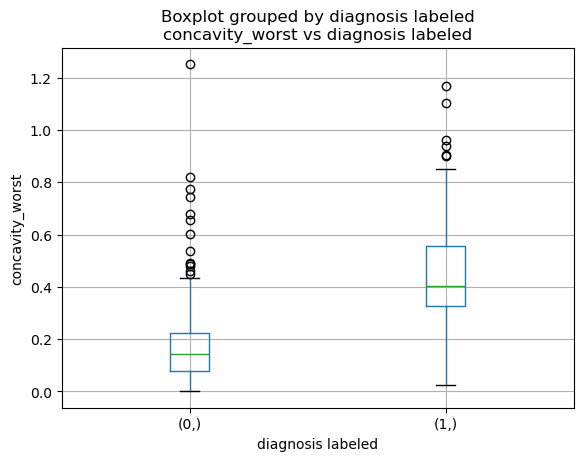

<Figure size 640x480 with 0 Axes>

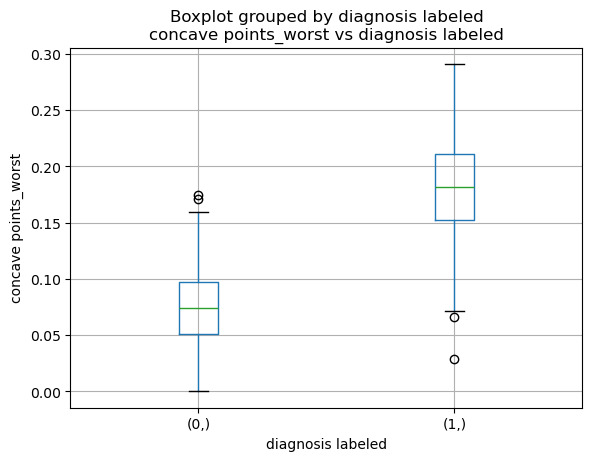

<Figure size 640x480 with 0 Axes>

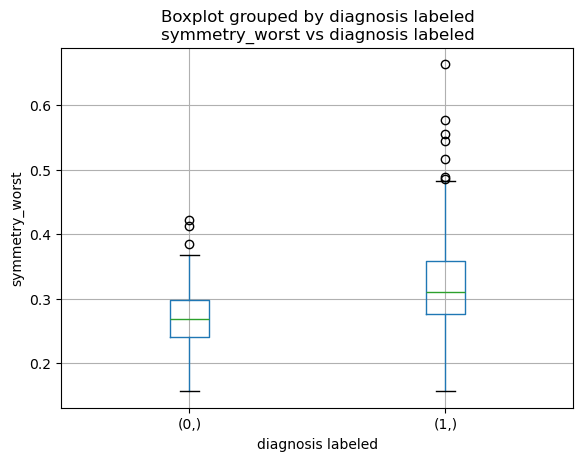

<Figure size 640x480 with 0 Axes>

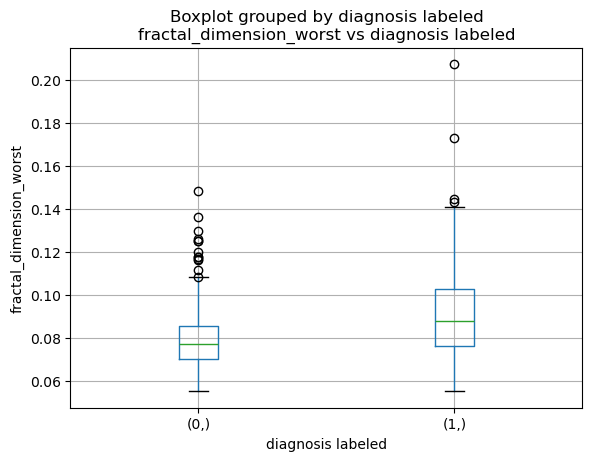

<Figure size 640x480 with 0 Axes>

In [69]:
for feature in data.columns:
    plt.figure(data.columns.get_loc(feature)+1)
    data.boxplot(column=feature, by=["diagnosis labeled"])
    plt.xlabel("diagnosis labeled")
    plt.ylabel(feature)    
    plt.title(f"{feature} vs diagnosis labeled")
    plt.show()

There are a lot of outliers in texture_mean, compactness_mean, concavity_mean, concave points_mean, fractal_dimension_mean, textured_se, perimeter_se, area_se, smoothness_se, compactness_se, concavity_se, etc.... A lot of these features have lots of data points that are in the outlier range. More so on the higher value range than the lower range. 

(for 0 = B and 1 = M from label encoder)

The boxplots seem to generally have the same shape. Where most of the average values for 0 is lower than 1. Since there are a lot of outliers, I will not be throwing away any of the data

Going to try normalizing the data and see what happens

======= radius_mean =====
Kurtosis: -0.10212936192716171
Skew: 0.3487439167461767


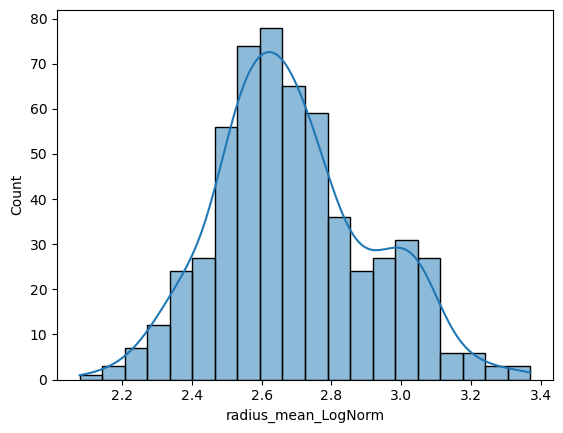

======= texture_mean =====
Kurtosis: -0.06748395110012906
Skew: 0.018733186023631783


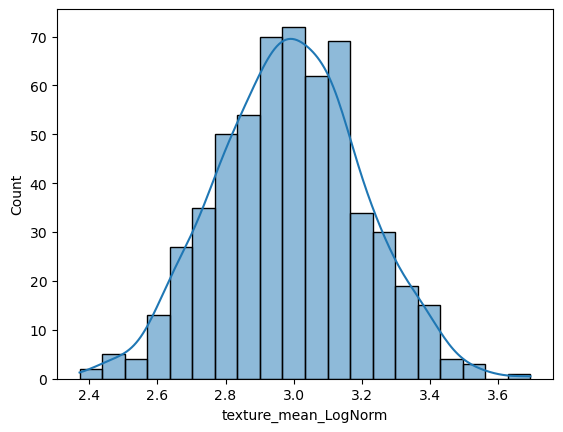

======= perimeter_mean =====
Kurtosis: -0.1157984927643092
Skew: 0.3287996723497268


======= area_mean =====
Kurtosis: -0.11253565395994025
Skew: 0.2873275616161656


======= smoothness_mean =====
Kurtosis: 0.7423474801551904
Skew: 0.4065479253464277


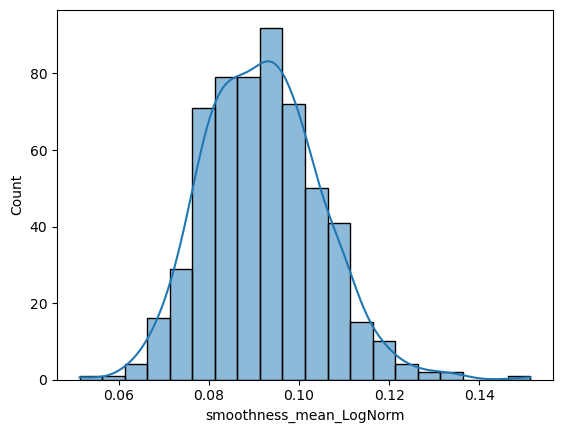

======= compactness_mean =====
Kurtosis: 1.1212055360682678
Skew: 1.0431948992217857


======= concavity_mean =====
Kurtosis: 1.2033226696597579
Skew: 1.206982161984789


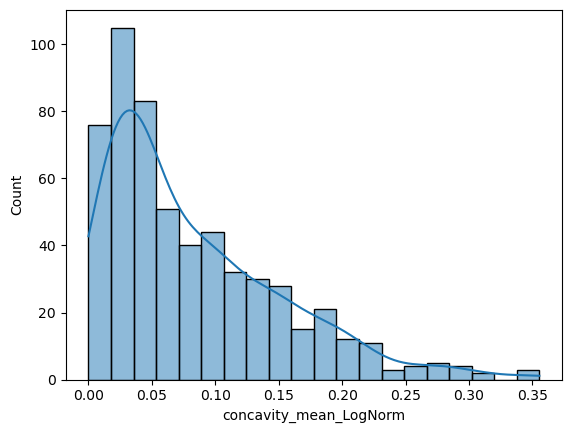

======= concave points_mean =====
Kurtosis: 0.7537422275953984
Skew: 1.0831801862884638


======= symmetry_mean =====
Kurtosis: 1.0627211358312527
Skew: 0.6327179382360036


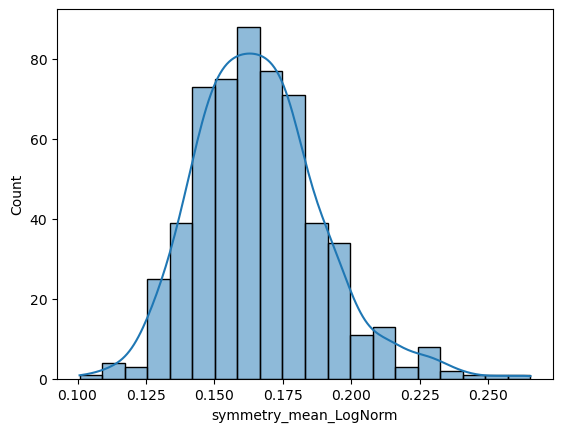

======= fractal_dimension_mean =====
Kurtosis: 2.858310842753852
Skew: 1.2722937281436475


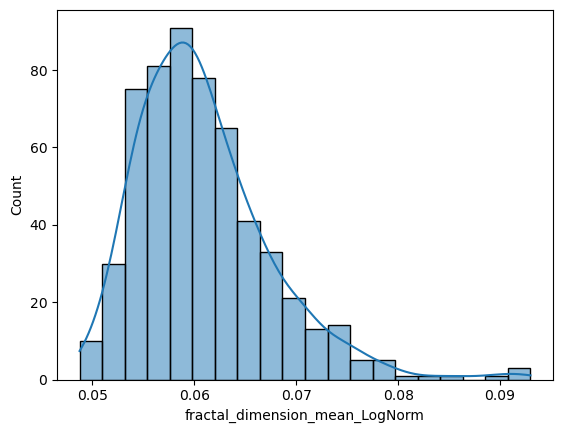

======= radius_se =====
Kurtosis: 4.593076550796485
Skew: 1.7134167972878425


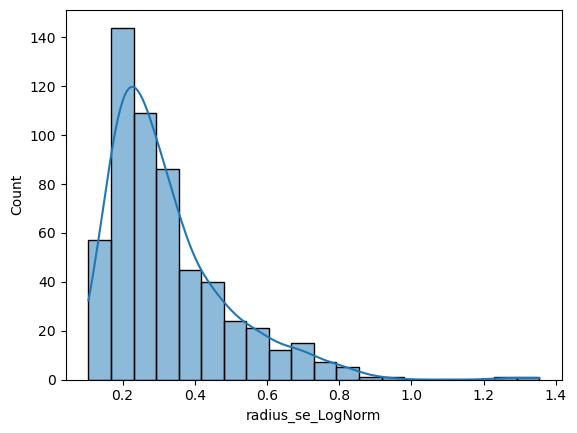

======= texture_se =====
Kurtosis: 0.76349697218668
Skew: 0.6295257510812305


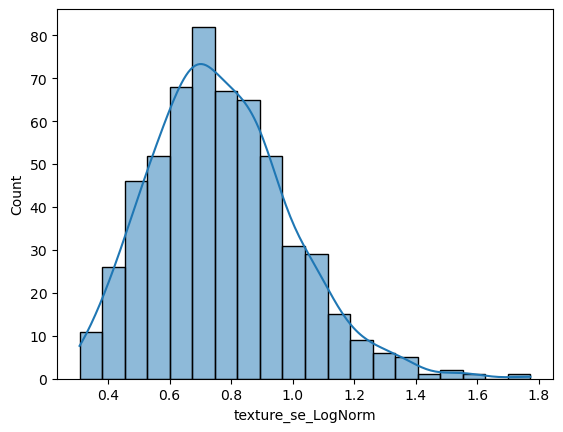

======= perimeter_se =====
Kurtosis: 1.321447781571278
Skew: 1.0253751968470768


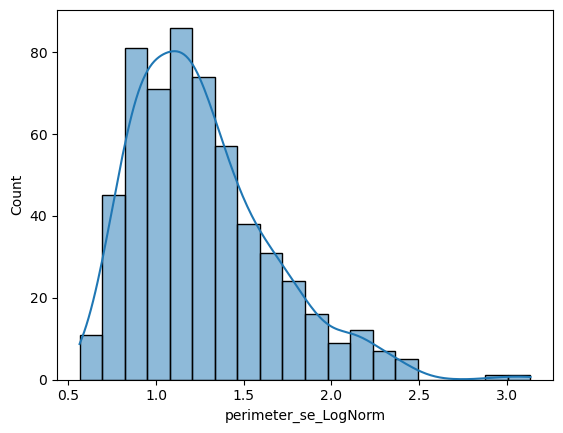

======= area_se =====
Kurtosis: 0.46206837468562734
Skew: 0.8472983033414304


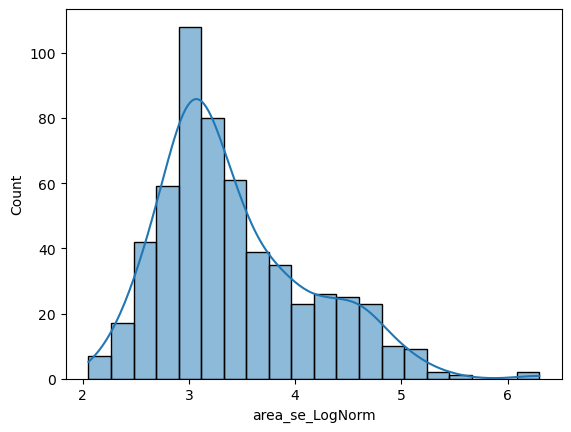

======= smoothness_se =====
Kurtosis: 10.182505377334873
Skew: 2.2833944080852504


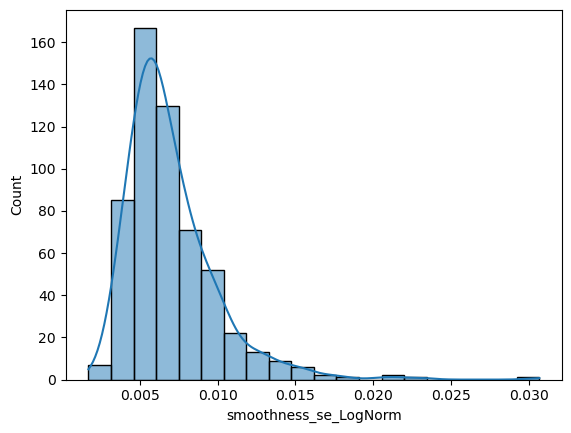

======= compactness_se =====
Kurtosis: 4.574703740583038
Skew: 1.8162775229092867


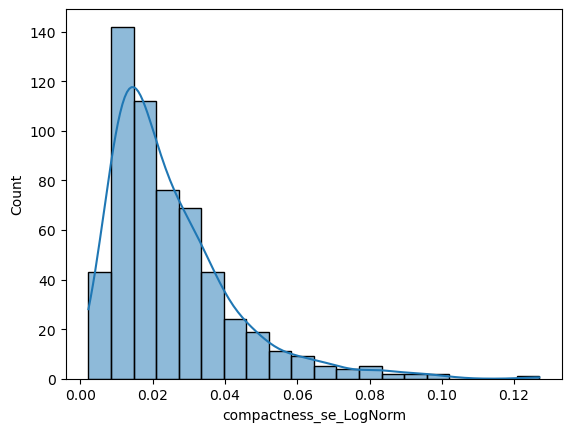

======= concavity_se =====
Kurtosis: 35.356909870569034
Skew: 4.231738327367887


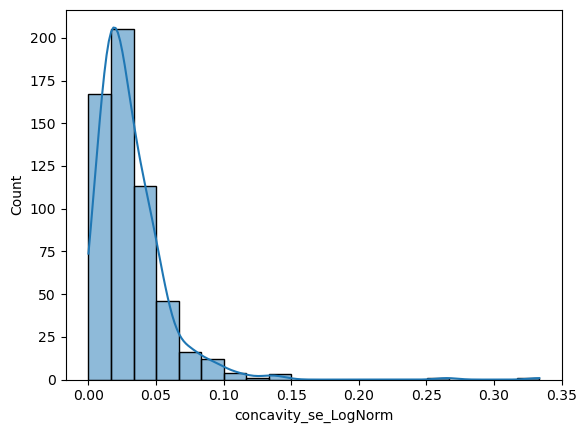

======= concave points_se =====
Kurtosis: 4.854663562519865
Skew: 1.399868772995197


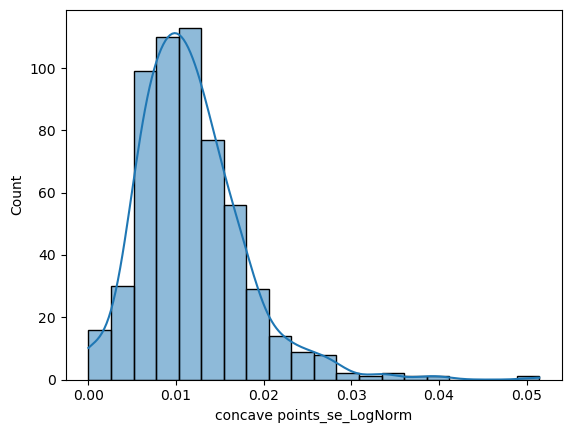

======= symmetry_se =====
Kurtosis: 7.446515237264234
Skew: 2.1358740862816155


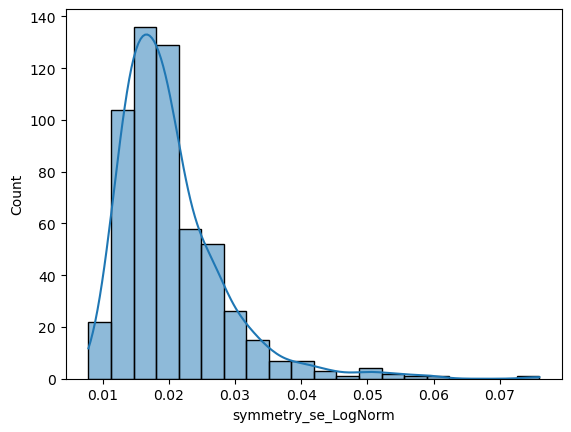

======= fractal_dimension_se =====
Kurtosis: 25.653550360065083
Skew: 3.87437264241285


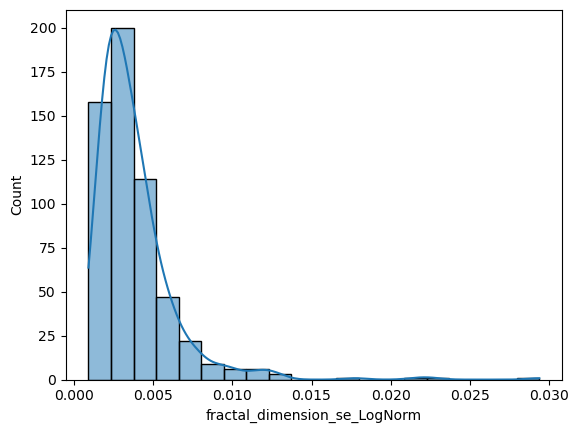

======= radius_worst =====
Kurtosis: -0.23993019138060934
Skew: 0.5063474063695756


======= texture_worst =====
Kurtosis: -0.3133626698463452
Skew: -0.10117758735223621


======= perimeter_worst =====
Kurtosis: -0.28324603443862895
Skew: 0.46275797288005877


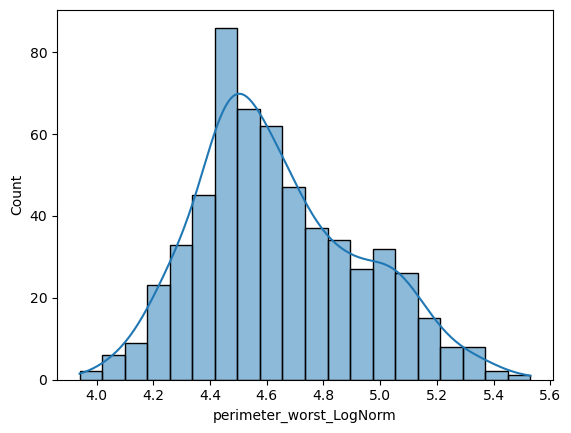

======= area_worst =====
Kurtosis: -0.24971916937667915
Skew: 0.4576135034703789


======= smoothness_worst =====
Kurtosis: 0.3944750986149743
Skew: 0.3463127555949764


======= compactness_worst =====
Kurtosis: 1.2810560685094092
Skew: 1.0487288239255648


======= concavity_worst =====
Kurtosis: 0.17494264781131896
Skew: 0.7179391715379748


======= concave points_worst =====
Kurtosis: -0.641168813820125
Skew: 0.38672052381500494


======= symmetry_worst =====
Kurtosis: 3.164233324124652
Skew: 1.1529838898497735


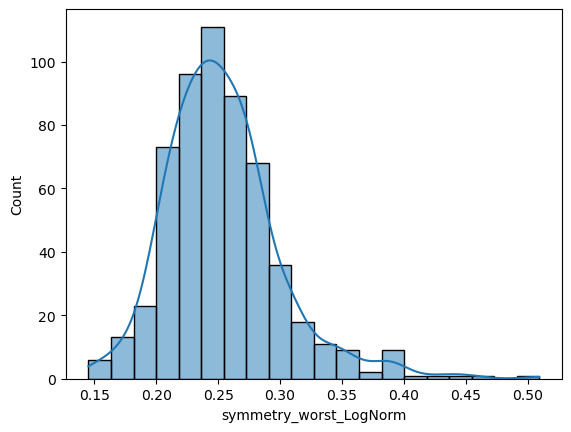

======= fractal_dimension_worst =====
Kurtosis: 4.521400705239324
Skew: 1.558559394847192


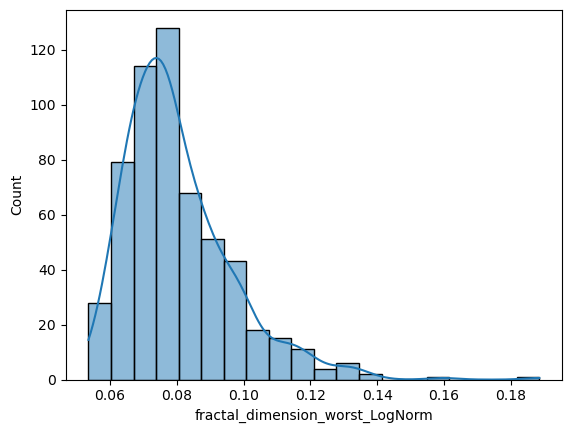

======= diagnosis labeled =====
Kurtosis: -1.7268106799233331
Skew: 0.5284613207977972


3.504339049851688
1.0855132309775015


In [77]:
kurtosis_list = []
skew_list = []
data_LogNorm = pd.DataFrame()
for feature in data.columns:
    data_LogNorm[f"{feature}_LogNorm"] = np.log1p(data[feature])
    kurt = data_LogNorm[f"{feature}_LogNorm"].kurtosis()
    skew = data_LogNorm[f"{feature}_LogNorm"].skew()
    
    print(f"======= {feature} =====") 
    print("Kurtosis:", kurt)
    print("Skew:", skew)
    
    plt.figure(data.columns.get_loc(feature)+1)
    sns.histplot(data_LogNorm[f"{feature}_LogNorm"], kde=True, bins=20)
    plt.show()

    kurtosis_list.append(kurt)
    skew_list.append(skew)

print(statistics.mean(kurtosis_list))
print(statistics.mean(skew_list))

Looks like lognorm-ing the data helped it get to mostly normalized, but I dont think I will be using this for the initial method

---
## Part 2: Perform Data Preparation (15 pts)
- Categorical data and missing data
- normalization
- binning if appropriate
- feature reduction or selection strategies if helpful
- Feature engineering can also be attempted if you feel it aids in your analysis. No specific step is required

Already dealed with categorical and missing data. 

Normalized data as well with the lognorm to see how it behaved (assuming you dont mean using the StandardScalar which I will do later)

Not sure how helpful binning will be. I am going to proceed with not doing this for now and do it later in other models to see if it helps.

For Feature Reduction, Im going to look at the Correlation HeatMap and drop features from rows that have a correlation of anything higher than 0.8 with the column label.

In [51]:
# Going to identify highly correlated features and remove them

mask = np.tril(np.ones(correlation_array.shape), k=-1).astype(bool) #Creates a mask for the lower triangular part of the correlation_array, excluding diagonal
filtered_values = correlation_array.where(mask & (correlation_array > 0.8)).stack() #apply the mask and filter values greater than 0.8
print(filtered_values)

features_to_remove = list(set(filtered_values.index.get_level_values(0)))
print(features_to_remove)

perimeter_mean           radius_mean            0.997855
area_mean                radius_mean            0.987357
                         perimeter_mean         0.986507
concavity_mean           compactness_mean       0.883121
concave points_mean      radius_mean            0.822529
                         perimeter_mean         0.850977
                         area_mean              0.823269
                         compactness_mean       0.831135
                         concavity_mean         0.921391
perimeter_se             radius_se              0.972794
area_se                  area_mean              0.800086
                         radius_se              0.951830
                         perimeter_se           0.937655
concavity_se             compactness_se         0.801268
fractal_dimension_se     compactness_se         0.803269
radius_worst             radius_mean            0.969539
                         perimeter_mean         0.969476
                         area_m

The above shows which rows have a high correlation with the columns. So in this case, all the items on the left most column (of the above output) will be removed to reduce impact of correlation between features

In [45]:
#**************************************************************
data_trimmed = data.drop(features_to_remove ,axis=1)
data_trimmed.columns

Index(['radius_mean', 'texture_mean', 'smoothness_mean', 'compactness_mean',
       'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se',
       'smoothness_se', 'compactness_se', 'concave points_se', 'symmetry_se',
       'symmetry_worst', 'diagnosis labeled'],
      dtype='object')

<Axes: >

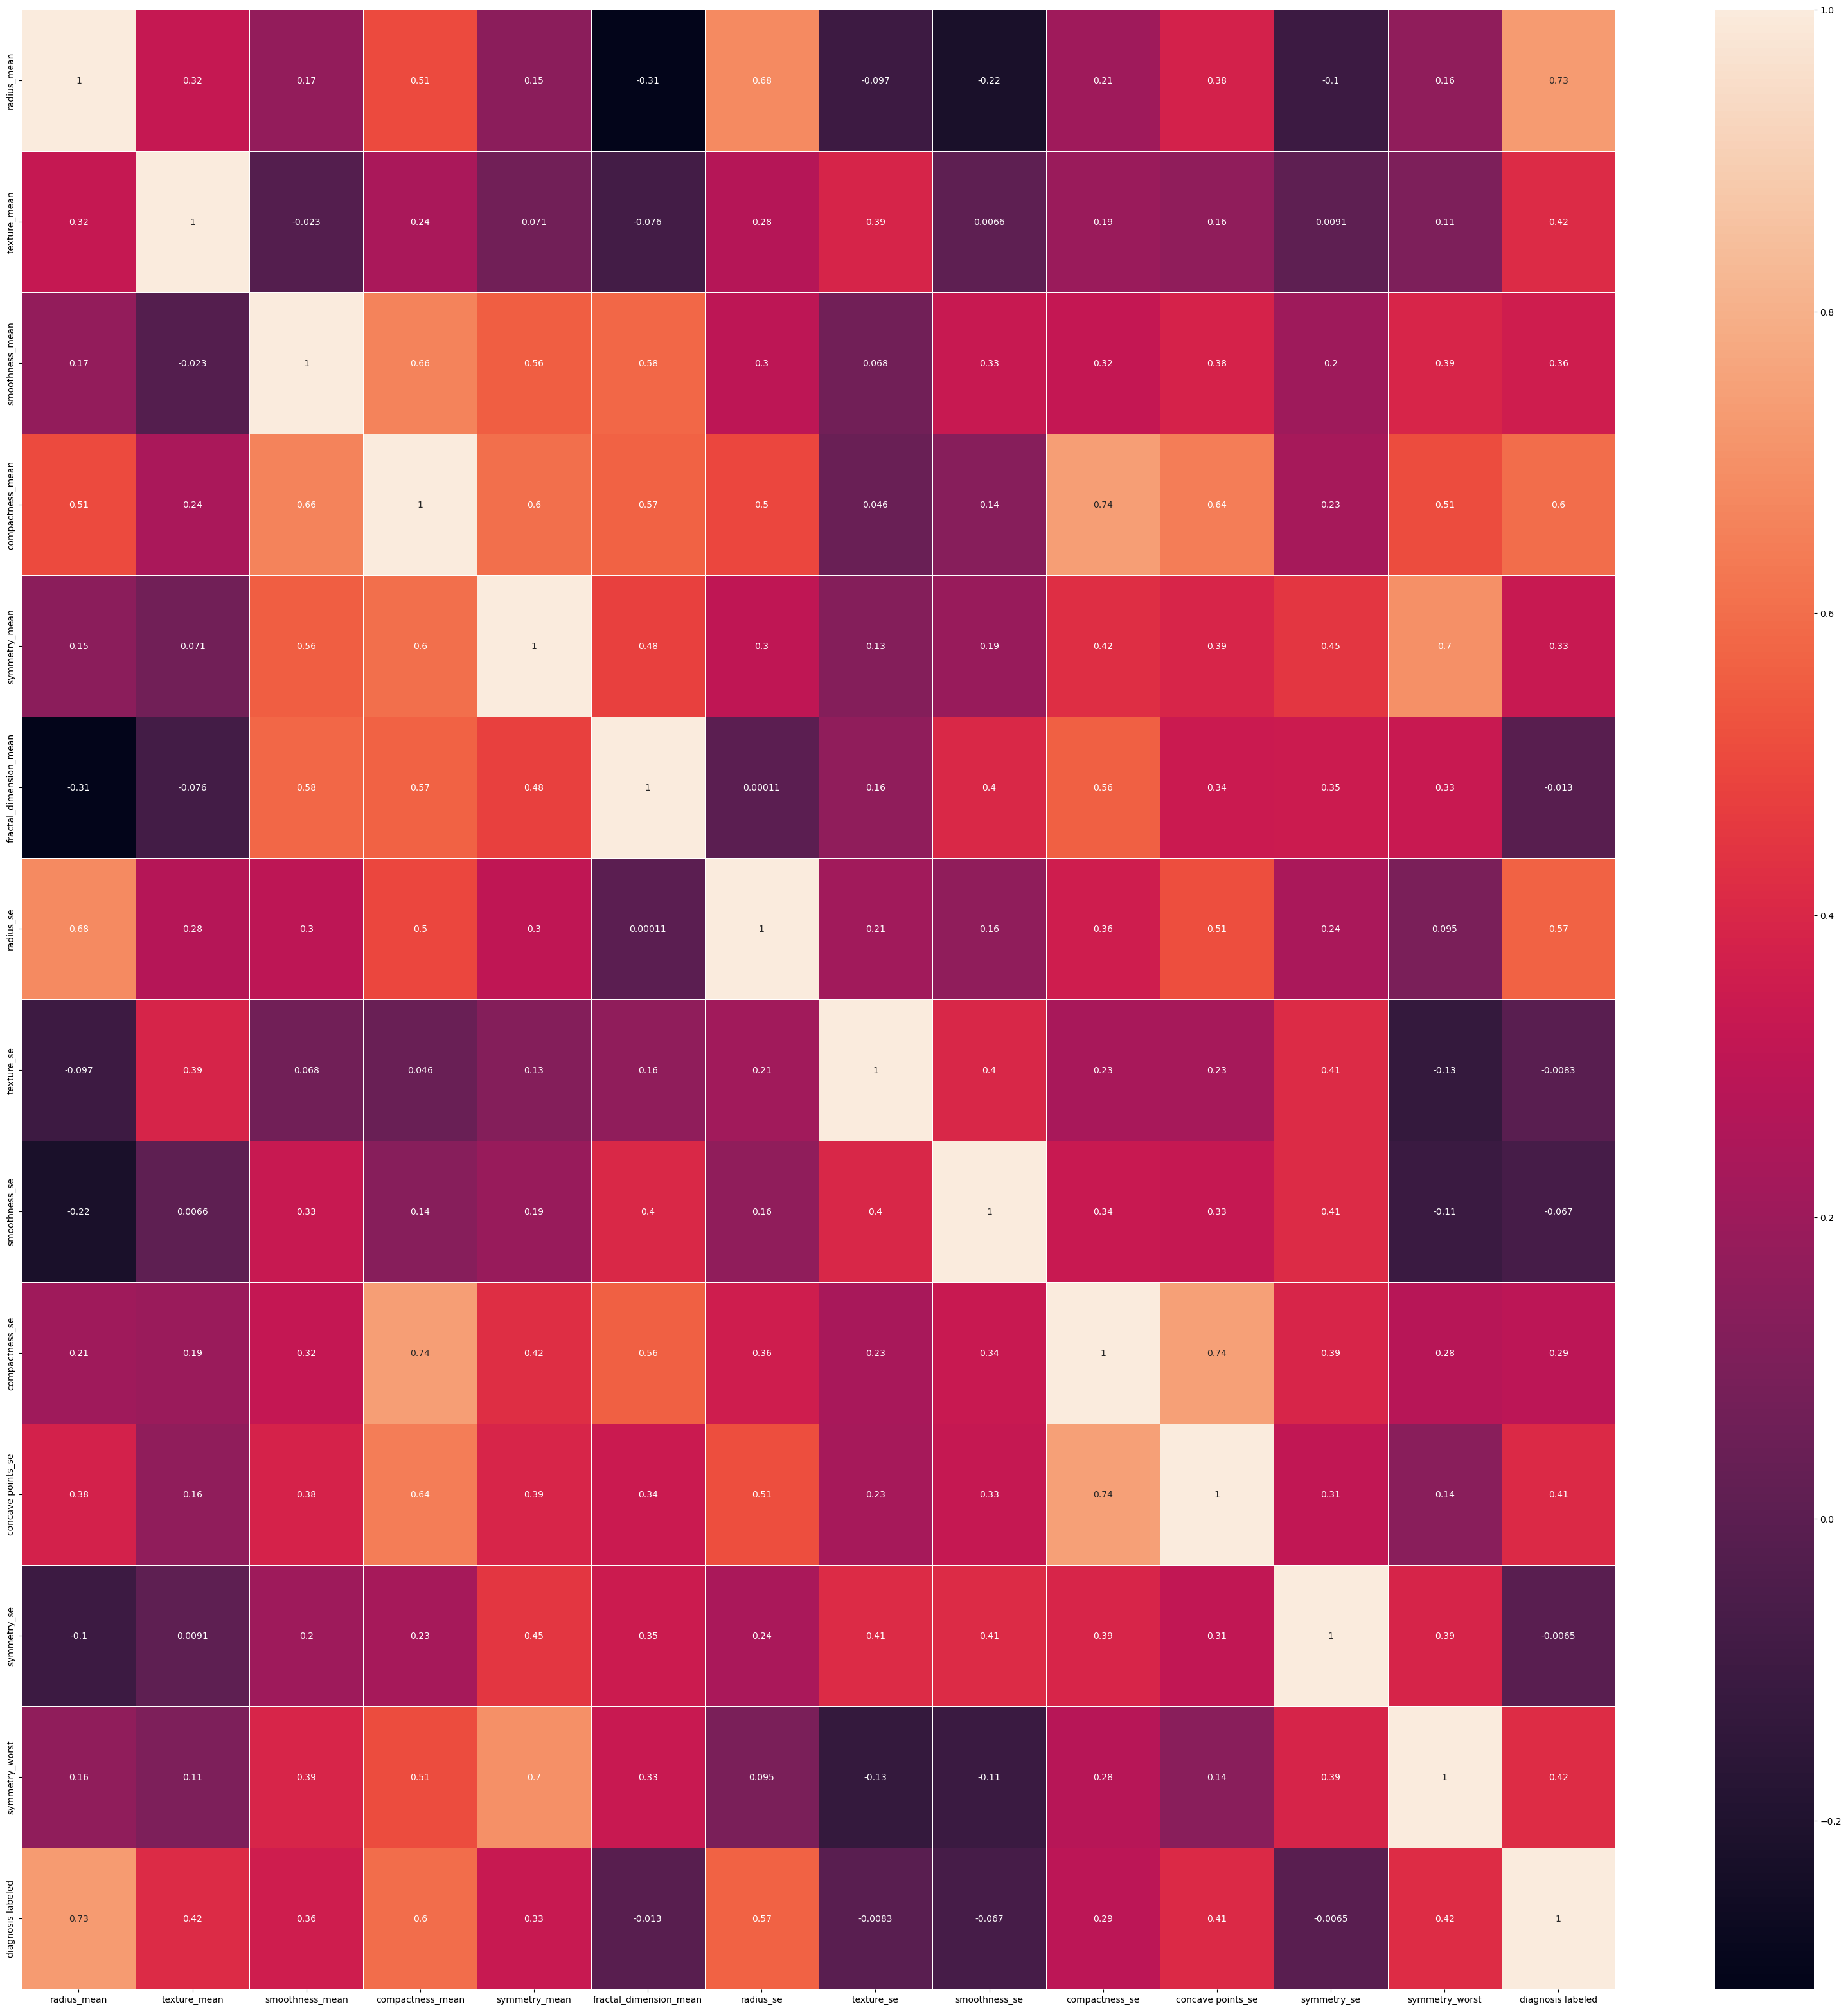

In [223]:
# Printing out the correlation heatmap for the trimmed data
fig, ax = plt.subplots(figsize=(40,40))
sns.heatmap(data_trimmed.corr(), annot=True, linewidths=0.5, ax=ax)

This data looks much better. The features that are very correlated are removed. There are still some items that are higher than 0.5, but to not cut out too much data, I am going to make the correlation cutoff point be 0.8 like I did earlier.

---
## Part 3: Divide data into testing and training sets. (10 pts)


In [52]:
#*************************************************************
X = data_trimmed.drop("diagnosis labeled", axis=1)
y = data_trimmed["diagnosis labeled"]

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42, stratify=y)

---
## Part 4: Train and test your model (25pts)
- use hyperparameter tuning methods (ex. gridsearch)
- be careful to not use too many options and pipelines (even if just for the model initialization).


In [149]:
models = ["lr","knn","svm","rf"]

Setting up parameter grids for Logistic Regression, K-nearest neighbors, Support Vector Machines, and Random Forest models. Going to do all 4 for learning purposes and to compare

In [159]:
# Making a dict of dicts that holds parameter grids for each model

model_param_grids = {
    "lr": {
        "lr__C":[0.01, 0.1, 1, 10]   #how large margin will be (smaller C = smaller margin)
                     },
    "knn": {
    "knn__n_neighbors": [3, 5, 7, 9],
    "knn__weights": ["uniform", "distance"],   # uniform makes the weights of the neighbor be equal, distance makes the weight be inversely prop to its distance from query point
    "knn__metric": ["euclidean", "manhattan"]
                      },
    "svm": {
    "svm__C": [0.01, 0.1, 1],           #how large margin will be (smaller C = smaller margin)
    "svm__kernel": ["linear", "poly"],  #going to use a linear and poly spread for the data. NOT using RBF (yet) since the average skew for data is 1.7
    "svm__degree": [2,3],               #going to assume the data has more than one curve
    "svm__probability": [True]
                      },
    "rf": {
    "rf__n_estimators": [100, 200, 300],    # number of decision trees in the forest. Higher number = improved accuracy and longer processing time
    "rf__max_depth": [None, 5, 10],         # depth of trees
    "rf__min_samples_split": [2, 5, 10],    # minumum number of samples required to split an internal node. Smaller value leads to overfitting
    "rf__min_samples_leaf": [1, 2, 4]       # minimum number of samples required to be a leaf node. Smaller value leads to overfitting
                     }
}

In [147]:
##### turned this all into a dict in the above step ##### Holding here just in case I need it later

# lr_param_grid = {
#    "lr__C":[0.01, 0.1, 1, 10]   #how large margin will be (smaller C = smaller margin)
# }

# knn_param_grid = {
#     "knn__n_neighbors": [3, 5, 7, 9],
#     "knn__weights": ["uniform", "distance"],  # uniform makes the weights of the neighbor be equal, distance makes the weight be inversely prop to its distance from query point
#     "knn__metric": ["euclidean", "manhattan"]
# }

# svm_param_grid = {
#     "svm__C": [0.01, 0.1, 1],           #how large margin will be (smaller C = smaller margin)
#     "svm__kernel": ["linear", "poly"],  #going to use a linear and poly spread for the data. NOT using RBF (yet) since the average skew for data is 1.7
#     "svm__degree": [2,3],               #going to assume the data has more than one curve
#     "svm__probability": [True]
# }

# rf_param_grid = {
#     "rf__n_estimators": [100, 200, 300],  # number of decision trees in the forest. Higher number = improved accuracy and longer processing time  
#     "rf__max_depth": [None, 5, 10],       # depth of trees  
#     "rf__min_samples_split": [2, 5, 10],  # minumum number of samples required to split an internal node. Smaller value leads to overfitting  
#     "rf__min_samples_leaf": [1, 2, 4]     # minimum number of samples required to be a leaf node. Smaller value leads to overfitting  
# }

Setting up pipelines for above. Im going to make them in a loop and store into a dict for access later. This way, there are less lines of code.

In [216]:
# Making pipelines

model_pipelines = {}

model_classes = {"lr":LogisticRegression(),
                 "knn": KNeighborsClassifier(),
                 "svm": SVC(),
                 "rf": RandomForestClassifier()}

for model in models:
    model_pipelines[model] = Pipeline(
        [
            (f"{model}_scaler", StandardScaler()),
            (model, model_classes[model])   # this line assignes each model name to their respective model
        ],
        verbose=True  # Time elapsed while fitting each step will be printed as it is completed
)

for key, value in model_pipelines.items():
    print(f"{key} \n {value} \n")

lr 
 Pipeline(steps=[('lr_scaler', StandardScaler()), ('lr', LogisticRegression())],
         verbose=True) 

knn 
 Pipeline(steps=[('knn_scaler', StandardScaler()),
                ('knn', KNeighborsClassifier())],
         verbose=True) 

svm 
 Pipeline(steps=[('svm_scaler', StandardScaler()), ('svm', SVC())], verbose=True) 

rf 
 Pipeline(steps=[('rf_scaler', StandardScaler()),
                ('rf', RandomForestClassifier())],
         verbose=True) 



In [ ]:
##### Automating this with the above cell, but keeping it just in case #####
# lr_pipeline = Pipeline(steps=[('lr_scaler', StandardScaler()), ('lr', LogisticRegression())], verbose=True)
# knn_pipeline = Pipeline(steps=[('knn_scaler', StandardScaler()), ('knn', KNeighborsClassifier())], verbose=True) 
# svm_pipeline = Pipeline(steps=[('svm_scaler', StandardScaler()), ('svm', SVC())], verbose=True) 
# rf_pipeline = Pipeline(steps=[('rf_scaler', StandardScaler()),('rf', RandomForestClassifier())], verbose=True) 

The below cell takes a while time to run due to random forest sizes (took approx 3.5min)

In [163]:
# Use pipeline and model parameter grids to process gridsearch and find best model parameters and CV scores

import time
grid_search_models = {}

start_time = time.time()

for model in models:
    print(f"============= START PROCESSING MODEL: {model} =============")
    grid_search_models[model] = GridSearchCV(model_pipelines[model], model_param_grids[model], cv=5, verbose=1)
    grid_search_models[model].fit(X_train, y_train)
    print(f"============= END PROCESSING MODEL: {model} =============\n\n\n")

for model in models:
    print(f"========== Model: {model} ==========")
    print(f"{model.upper()} Best parameters: ", grid_search_models[model].best_params_)
    print(f"{model.upper()} Best Cross-Validation score: ", grid_search_models[model].best_score_)

end_time = time.time()

print("elapsed time (seconds): ", end_time-start_time)

============= START PROCESSING MODEL: lr =============
Fitting 5 folds for each of 4 candidates, totalling 20 fits
[Pipeline] ......... (step 1 of 2) Processing lr_scaler, total=   0.0s
[Pipeline] ................ (step 2 of 2) Processing lr, total=   0.0s
[Pipeline] ......... (step 1 of 2) Processing lr_scaler, total=   0.0s
[Pipeline] ................ (step 2 of 2) Processing lr, total=   0.0s
[Pipeline] ......... (step 1 of 2) Processing lr_scaler, total=   0.0s
[Pipeline] ................ (step 2 of 2) Processing lr, total=   0.0s
[Pipeline] ......... (step 1 of 2) Processing lr_scaler, total=   0.0s
[Pipeline] ................ (step 2 of 2) Processing lr, total=   0.0s
[Pipeline] ......... (step 1 of 2) Processing lr_scaler, total=   0.0s
[Pipeline] ................ (step 2 of 2) Processing lr, total=   0.0s
[Pipeline] ......... (step 1 of 2) Processing lr_scaler, total=   0.0s
[Pipeline] ................ (step 2 of 2) Processing lr, total=   0.0s
[Pipeline] ......... (step 1 of 2

In [152]:
##### Keeping this stuff down here for future use if needed. Might help clarify what is going on above^ #####
## For Logistic Regression
# grid_search_lr = GridSearchCV(lr_pipeline, lr_param_grid, cv=5, verbose=1) # cross validation of 5 
    
# #fit and train the model
# grid_search_lr.fit(X_train, y_train)

# print("LR Best parameters:", grid_search_lr.best_params_)
# print("LR Best cross-validation score:", grid_search_lr.best_score_)

## For KNN
# grid_search_knn = GridSearchCV(knn_pipeline, knn_param_grid, cv=5, verbose=1) # cross validation of 5 
    
# #fit and train the model
# grid_search_knn.fit(X_train, y_train)

# print("knn Best parameters:", grid_search_knn.best_params_)
# print("knn Best cross-validation score:", grid_search_knn.best_score_)

Generating the best models based of what was done earlier. Then I will make y_pred values from both test and train sets

## Part 5: Produce effectiveness metrics and results (25 pts)
 - Discuss which are most relevant and analyze results.
 - Does your approach generalize?
 - Why are the metrics you chose to assess performance relevant?


In [207]:
# generate models and y_predict for train and test data

# creating a bunch of dicts to store data into with a loop (cuts down on amount of cells being used)
best_mdls={}
mdl_results = {}
y_pred_train_mdls = {}
y_pred_test_mdls = {}
mdl_scores = {}

for model in models: # as a reminder, the list of models is this: models = ["lr","knn","svm","rf"]

    # model storing and processing
    best_mdls[model] = grid_search_models[model].best_estimator_    # grab model's best estimator
    mdl_results[model] = grid_search_models[model].cv_results_       # grab the model's cross validation results
    y_pred_train_mdls[model] = best_mdls[model].predict(X_train)     # use the model's best estimator to predict with training data
    y_pred_test_mdls[model] = best_mdls[model].predict(X_test)       # use the model's best estimator to predict with testing data

    # generate training scores
    mdl_scores[model] = {}
    mdl_scores[model]["train_accuracy"] = accuracy_score(y_train, y_pred_train_mdls[model])
    mdl_scores[model]["train_precision"] = precision_score(y_train, y_pred_train_mdls[model])
    mdl_scores[model]["train_recall"] = recall_score(y_train, y_pred_train_mdls[model])
    mdl_scores[model]["train_f1"] = f1_score(y_train, y_pred_train_mdls[model])
    mdl_scores[model]["train_roc_auc"] = roc_auc_score(y_train, y_pred_train_mdls[model])

    # generate testing scores
    mdl_scores[model]["test_accuracy"] = accuracy_score(y_test, y_pred_test_mdls[model])
    mdl_scores[model]["test_precision"] = precision_score(y_test, y_pred_test_mdls[model])
    mdl_scores[model]["test_recall"] = recall_score(y_test, y_pred_test_mdls[model])
    mdl_scores[model]["test_f1"] = f1_score(y_test, y_pred_test_mdls[model])
    mdl_scores[model]["test_roc_auc"] = roc_auc_score(y_test, y_pred_test_mdls[model])

In [206]:
# print out model scores

for model in models:
    print(f"==============   {model.upper()}   ================")

    train_test_print_spacer = 0
    print("\t----- Train Scores -----")
    for key, value in mdl_scores[model].items():
        if "test" in key and train_test_print_spacer == 0:
            print("\t----- Test Scores -----")
            train_test_print_spacer += 1
            print(f"{key}:\t{value}")
        else:
            print(f"{key}:\t{value}")
    print("\n")

==============   LR   ================
	----- Train Scores -----
train_accuracy:	0.9692307692307692
train_precision:	0.9698795180722891
train_recall:	0.9470588235294117
train_f1:	0.9583333333333334
train_roc_auc:	0.9647574819401444
	----- Test Scores -----
test_accuracy:	0.9298245614035088
test_precision:	0.9047619047619048
test_recall:	0.9047619047619048
test_f1:	0.9047619047619048
test_roc_auc:	0.9246031746031745


==============   KNN   ================
	----- Train Scores -----
train_accuracy:	1.0
train_precision:	1.0
train_recall:	1.0
train_f1:	1.0
train_roc_auc:	1.0
	----- Test Scores -----
test_accuracy:	0.8947368421052632
test_precision:	0.9411764705882353
test_recall:	0.7619047619047619
test_f1:	0.8421052631578947
test_roc_auc:	0.867063492063492


==============   SVM   ================
	----- Train Scores -----
train_accuracy:	0.9714285714285714
train_precision:	0.9815950920245399
train_recall:	0.9411764705882353
train_f1:	0.960960960960961
train_roc_auc:	0.9653250773993808
	

The scores are very suprising to see for a first run for how high they are. I'm a bit skeptical that the results are actually true. I will have to go back and review the data and features to see if any errors exist

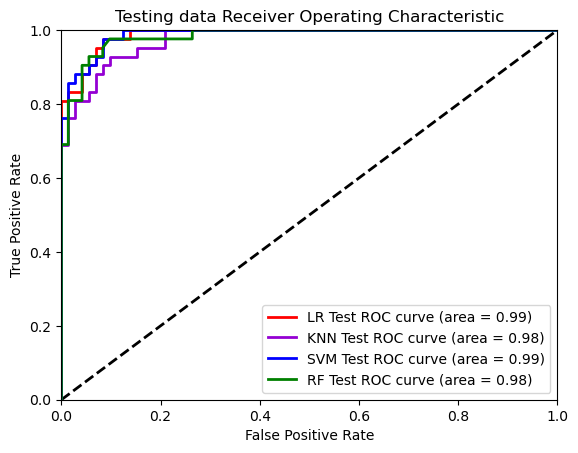

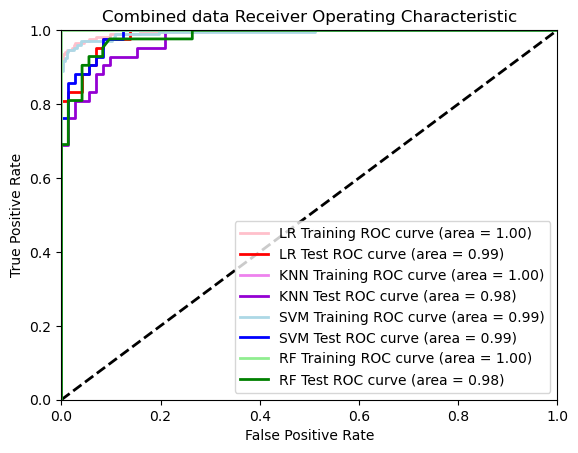

In [215]:
# generate roc curve and roc_auc_score

# creating training dicts to fill
best_y_train_pred_prob = {}
fpr_train = {}
tpr_train= {}
thresholds_train = {}
roc_auc_train = {}

# creating testing dicts to fill
best_y_test_pred_prob = {}
fpr_test = {}
tpr_test= {}
thresholds_test = {}
roc_auc_test = {}

# training ROC plot
train_figure = plt.figure(1)
ax_train = train_figure.add_subplot(111) # add axes to the figure to manipulate each plot individually
ax_train.plot([0, 1], [0, 1], color='black', lw=2, linestyle='--')
ax_train.set_xlim([0.0, 1.0])
ax_train.set_ylim([0.0, 1.0])
ax_train.set_xlabel('False Positive Rate')
ax_train.set_ylabel('True Positive Rate')
ax_train.set_title('Training data Receiver Operating Characteristic')

# testing ROC plot
test_figure = plt.figure(2) # will fill with testing info
ax_test = test_figure.add_subplot(111)
ax_test.plot([0, 1], [0, 1], color='black', lw=2, linestyle='--')
ax_test.set_xlim([0.0, 1.0])
ax_test.set_ylim([0.0, 1.0])
ax_test.set_xlabel('False Positive Rate')
ax_test.set_ylabel('True Positive Rate')
ax_test.set_title('Testing data Receiver Operating Characteristic')

# Combined ROC plot
combined_figure = plt.figure(3) # will fill with both test and training info
ax_combined = combined_figure.add_subplot(111)
ax_combined.plot([0, 1], [0, 1], color='black', lw=2, linestyle='--')
ax_combined.set_xlim([0.0, 1.0])
ax_combined.set_ylim([0.0, 1.0])
ax_combined.set_xlabel('False Positive Rate')
ax_combined.set_ylabel('True Positive Rate')
ax_combined.set_title('Combined data Receiver Operating Characteristic')


# reminder for myself that this is what the models list is: models = ["lr","knn","svm","rf"]
# there are two colors per model to differentiate between training and test
line_colors = {"lr": ["pink", "red"],
               "knn": ["violet", "darkviolet"],
               "svm": ["lightblue", "blue"],
               "rf": ["lightgreen", "green"]
              }

for model in models:

    # get ROC stuff for training data
    best_y_train_pred_prob[model] = best_mdls[model].predict_proba(X_train)[:,1]
    fpr_train[model], tpr_train[model], thresholds_train[model] = roc_curve(y_train, best_y_train_pred_prob[model])
    roc_auc_train[model] = auc(fpr_train[model], tpr_train[model])

    # get ROC stuff for testing data
    best_y_test_pred_prob[model] = best_mdls[model].predict_proba(X_test)[:,1]
    fpr_test[model], tpr_test[model], thresholds_test[model] = roc_curve(y_test, best_y_test_pred_prob[model])
    roc_auc_test[model] = auc(fpr_test[model], tpr_test[model])

    # generating training ROC Curve plot and combined plot
    ax_train.plot(fpr_train[model], tpr_train[model], color=line_colors[model][0], lw=2,
                   label=f"{model.upper()} Training ROC curve (area = %0.2f)" % roc_auc_train[model])
    ax_combined.plot(fpr_train[model], tpr_train[model], color=line_colors[model][0], lw=2, 
                   label=f"{model.upper()} Training ROC curve (area = %0.2f)" % roc_auc_train[model])
    
    # generating testing ROC Curve plot and combined plot
    ax_test.plot(fpr_test[model], tpr_test[model], color=line_colors[model][1], lw=2, 
                   label=f"{model.upper()} Test ROC curve (area = %0.2f)" % roc_auc_test[model])
    ax_combined.plot(fpr_test[model], tpr_test[model], color=line_colors[model][1], lw=2, 
                   label=f"{model.upper()} Test ROC curve (area = %0.2f)" % roc_auc_test[model])

ax_train.legend(loc="lower right")
ax_test.legend(loc="lower right")
ax_combined.legend(loc="lower right")

plt.show()

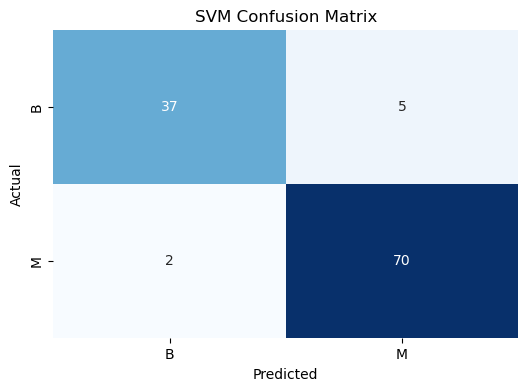

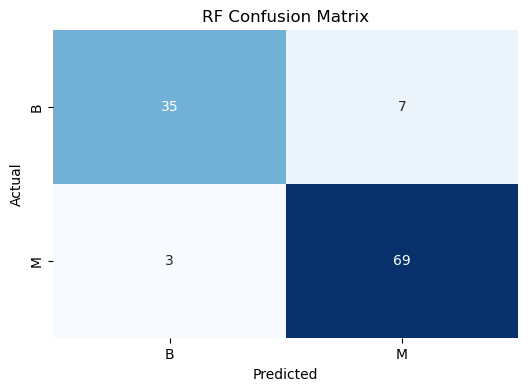

In [221]:
# generate confusion matrix
# as a reminder for what 0 and 1 are: ['B' 'M']

conf_matrix_mdls = {}

for model in models:
    conf_matrix_mdls[model] = confusion_matrix(y_test, y_pred_test_mdls[model], labels=[True, False])
    plt.figure(figsize=(6,4))
    sns.heatmap(conf_matrix_mdls[model], annot=True, fmt="d", cmap="Blues", cbar=False,
                xticklabels=["B", "M"], yticklabels=["B","M"])
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(f"{model.upper()} Confusion Matrix")
    plt.show()


For all four of the models I chose, it appears that they are all very good at predicting what could happen. If there was another dataset similar to the cancer.csv, I think I could test it further but for now, it seems like this is as far as I can go. To address the note I made earlier about how I was skeptical about the results, I tried reviewing the tested featured and the parameters in the model_param_grids dict and they seem to be pretty solid. I tried to run this with different features (adding and removing from the data_trimmed dataframe) and it didn't seem to help.

For what data I have, it appears that all models generalizes. In this assignment, I wanted to learn about and test all the model types, but it seems like the gridsearch function mixed with my params helped with creating what seems like a near perfect model. To be honest though, there are not enough samples to really tell if the model is good or not. In the previous assignment, the amount of samples was way higher than this dataset.

From the comparison of just the models, it seems like Simple Vector Machine (SVM) performed the best in the test set. K-Nearest-Neighbors (KNN) had perfect scores in training but it depreciated more than the other models. If I were to rank them in which were the most to least relevant, I would say it would be:

(1) SVM 

(2) LR

(3) RF

(4) KNN

The metrics I chose to analyze this model from the data were relevant because they cover both balanced and imbalanced datasets. AUC and F1 scores review the unbalanced metric of the dataset and the recall, precision, and accuracy cover the bases for balanced datasets. This dataset is of course, not balanced, but I think the metrics I chose to try using to score the models were relevant

## Part 6: Skip iteration and compare the different models' results and provide commentary. (10 pts)


Wish I re-read the assignment before realizing I didn't need to iterate. I won't include it here in the notebook since it is not necessary. I believe the commentary I spoke about in the above cell (part 5) is enough for comparing the different models. It is not suprising that KNN and RF performed worse than LR and SVM. In the beginning of this assignment, I guessed that LR would perform the best and RF and KNN would perform not as well, with no idea how SVM would look. I drew these assumptions from the fact that LR is pretty simple, so it doesnt have overly complex methods in classifying. KNN and RF hold too many dependencies on the data and generated overfit models. They are also much more complex compared to the LR and SVM models.

To speak on the iteration that I did do, I tried modifying the data to make the classes of benign and malignent tumors to be equal, but that cut the number of samples to be only 424, which doesn't seem like it's nearly enough (when comparing to the amount of samples we had for the airplane customer satisfaction dataset - 103,905 samples). I tried modifying the C params and other hyperparameters in the param_grid, but what I had were best.

My honest assumption for these models is that they are most likely overfit. The fact that the dataset is small and non-parametric do not sit well with me. If I were to do this as a full time job, I would not trust these models due to the low amount of datasets. I understand that gathering this information is much more strenious and difficult than gathering samples for the airplane customer satisfaction, but still, not enough data.